In [1]:
# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
# These imports are actually NOT NEEDED if you already know the name of
# the ttree within the root file.
import math
from math import exp
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.axes as axes
from matplotlib.colors import LogNorm
import uproot
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.mlab as mlab
from pylab import rcParams
plt.rcParams.update({'font.size': 18})



from root_numpy import root2array
from scipy.interpolate import interp1d
from scipy.misc import factorial

Welcome to JupyROOT 6.12/06


In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
folder = "gamma3d"

TREE_CLUSTER = "Clustertree"
TREE_MATCHING = "Matchingtree"


In [4]:
file_1tick='/uboone/app/users/abhat/gammacatcher_v08_00_00_17/srcs/ubreco/ubreco/GammaCatcher/ClusterTrackDistance_1tick_1hit_hist.root'
file_3tick='/uboone/app/users/abhat/gammacatcher_v08_00_00_17/srcs/ubreco/ubreco/GammaCatcher/ClusterTrackDistance_3tick_1hit_hist.root'
file_5tick='/uboone/app/users/abhat/gammacatcher_v08_00_00_17/srcs/ubreco/ubreco/GammaCatcher/ClusterTrackDistance_5tick_1hit_hist.root'
file_10tick='/uboone/app/users/abhat/gammacatcher_v08_00_00_17/srcs/ubreco/ubreco/GammaCatcher/ClusterTrackDistance_10tick_1hit_hist.root'
file_1tick_v04='/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v04_1tick.root'
file_2tick_v04='/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v04_2tick.root'
file_3tick_v04='/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v04_3tick.root'

In [5]:
Cluster_tree_1tick = uproot.open(file_1tick)[folder][TREE_CLUSTER]
Matching_tree_1tick = uproot.open(file_1tick)[folder][TREE_MATCHING]
Cluster_tree_1tick_v04 = uproot.open(file_1tick_v04)[folder][TREE_CLUSTER]
Matching_tree_1tick_v04 = uproot.open(file_1tick_v04)[folder][TREE_MATCHING]
Cluster_tree_2tick_v04 = uproot.open(file_2tick_v04)[folder][TREE_CLUSTER]
Matching_tree_2tick_v04 = uproot.open(file_2tick_v04)[folder][TREE_MATCHING]
Cluster_tree_3tick_v04 = uproot.open(file_3tick_v04)[folder][TREE_CLUSTER]
Matching_tree_3tick_v04 = uproot.open(file_3tick_v04)[folder][TREE_MATCHING]
Cluster_tree_3tick = uproot.open(file_3tick)[folder][TREE_CLUSTER]
Matching_tree_3tick = uproot.open(file_3tick)[folder][TREE_MATCHING]
Cluster_tree_5tick = uproot.open(file_5tick)[folder][TREE_CLUSTER]
Matching_tree_5tick = uproot.open(file_5tick)[folder][TREE_MATCHING]
Cluster_tree_10tick = uproot.open(file_10tick)[folder][TREE_CLUSTER]
Matching_tree_10tick = uproot.open(file_10tick)[folder][TREE_MATCHING]

In [6]:
CLEAN_REGION = '(Y_cluster_3d_hit_z>800 or (Y_cluster_3d_hit_z>400 and Y_cluster_3d_hit_z<600))'
MATCH_CUT='Y_cluster_3d_hit_y > -120.0 and Y_cluster_3d_hit_y < 120.0'

In [7]:
df_Matching_1tick=Matching_tree_1tick.pandas.df().query(CLEAN_REGION)
df_Matching_1tick_v04=Matching_tree_1tick_v04.pandas.df().query(CLEAN_REGION)
df_Matching_2tick_v04=Matching_tree_2tick_v04.pandas.df().query(CLEAN_REGION)
df_Matching_3tick_v04=Matching_tree_3tick_v04.pandas.df().query(CLEAN_REGION)
df_Matching_3tick=Matching_tree_3tick.pandas.df().query(CLEAN_REGION)
df_Matching_5tick=Matching_tree_5tick.pandas.df().query(CLEAN_REGION)
df_Matching_10tick=Matching_tree_10tick.pandas.df().query(CLEAN_REGION)
df_Matching_1tick_v04_match=df_Matching_1tick_v04.query(MATCH_CUT)
df_Matching_2tick_v04_match=df_Matching_2tick_v04.query(MATCH_CUT)
df_Matching_3tick_v04_match=df_Matching_3tick_v04.query(MATCH_CUT)

In [8]:
df_Matching_1tick.head()

,V_biggest_iou,V_match_multiplicity,U_biggest_iou,U_match_multiplicity,Y_clus_lifetime,Y_clus_hitSize,V_clus_hitSize,U_clus_hitSize,Y_cluster_3d_hit_z,Y_cluster_3d_hit_x,...,YU_iou,deltaY,deltaY_smallest,Y_Wire,start_tick_cluster0,start_tick_cluster1,start_tick_cluster2,end_tick_cluster0,end_tick_cluster1,end_tick_cluster2
entry,,,,,,,,,,,,,,,,,,,,,
29,-1.000000,0,0.672041,1,4.028076,4.0,2.0,2.0,417.599999,50.360258,...,0.672041,-9999.000000,48.670628,1395,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30,-1.000000,0,0.431440,1,3.601318,2.0,2.0,2.0,421.799999,53.903091,...,0.431440,-9999.000000,48.670628,1407,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
31,0.899524,1,0.609350,1,3.322266,2.0,2.0,3.0,437.999999,230.860344,...,0.609350,0.173205,48.670628,1461,5014.850586,5016.021484,5016.359375,5020.302734,5019.714844,5019.681641
32,0.585875,1,-1.000000,0,2.163696,2.0,2.0,3.0,444.599999,26.762246,...,-1.000000,-9999.000000,48.670628,1483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
33,0.511533,1,-1.000000,0,2.000000,1.0,2.0,3.0,473.399999,227.262909,...,-1.000000,-9999.000000,48.670628,1578,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


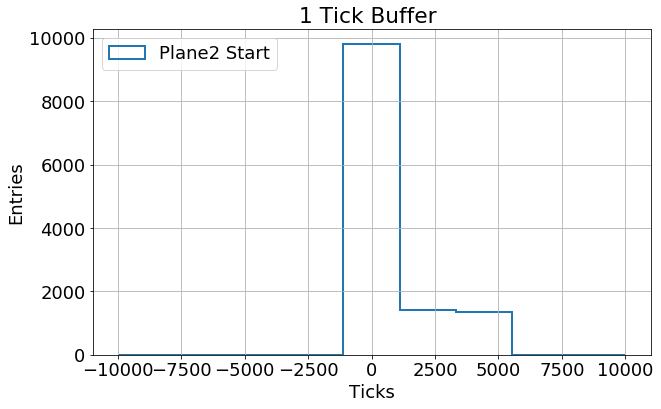

In [9]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-10000,10000,10)
plt.hist((df_Matching_10tick['start_tick_cluster2']).values,bins=BINS,histtype='step',lw=2,label='Plane2 Start')
plt.title("1 Tick Buffer ")
plt.xlabel('Ticks')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()

In [10]:
zero_cluster_start_cut='(start_tick_cluster2 !=0 and start_tick_cluster1 !=0 and start_tick_cluster0 !=0 and Y_clus_hitSize==1 and V_clus_hitSize==1 and U_clus_hitSize==1)'
zero_cluster_end_cut='(end_tick_cluster2 !=0 and end_tick_cluster1 !=0 and end_tick_cluster0 !=0 and Y_clus_hitSize==1 and V_clus_hitSize==1 and U_clus_hitSize==1)'

In [11]:
df_final_1tick_start=df_Matching_1tick.query(zero_cluster_start_cut)
df_final_3tick_start=df_Matching_3tick.query(zero_cluster_start_cut)
df_final_5tick_start=df_Matching_5tick.query(zero_cluster_start_cut)
df_final_10tick_start=df_Matching_10tick.query(zero_cluster_start_cut)
df_final_1tick_end=df_Matching_1tick.query(zero_cluster_end_cut)
df_final_3tick_end=df_Matching_3tick.query(zero_cluster_end_cut)
df_final_5tick_end=df_Matching_5tick.query(zero_cluster_end_cut)
df_final_10tick_end=df_Matching_10tick.query(zero_cluster_end_cut)

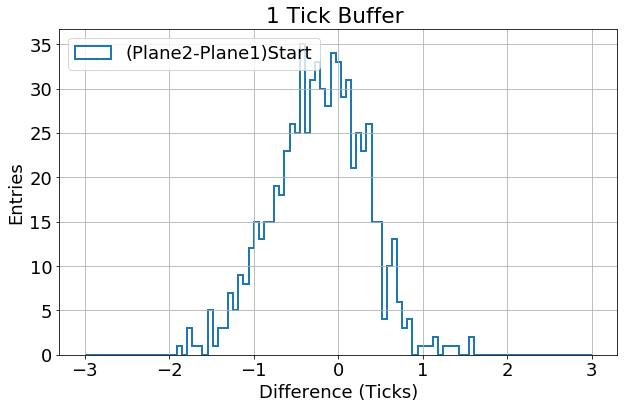

In [12]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-3,3,100)
plt.hist((df_final_1tick_start['start_tick_cluster2']-df_final_1tick_start['start_tick_cluster1']).values,bins=BINS,histtype='step',lw=2,label='(Plane2-Plane1)Start')
plt.title("1 Tick Buffer ")
plt.xlabel('Difference (Ticks)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()

In [13]:
fig = plt.figure(figsize=(8,8))
binv, bine = np.histogram((df_final_1tick_start['start_tick_cluster2']-df_final_1tick_start['start_tick_cluster1']).values,bins=BINS)
binc = (0.5)*(bine[1:]+bine[:-1])
binv = binv.astype(float) 
errors = np.sqrt(binv)
#plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)

#plt.show()


BINWIDTH = binc[1]-binc[0]


<Figure size 576x576 with 0 Axes>

In [14]:
def gauss(x,A,mu,sigma):
    return A * np.exp( - ((x-mu)**2) / (2 * sigma**2) )

gauss(1,2,3,4)

0.7357588823428847

In [15]:
guess = [np.sum(binv), -0.07, 0.65]
xmin = -2.0 # minimum bin entry 
xmax = 2.0 # maximum bin entry:

In [16]:
popt,popv = curve_fit(gauss,binc,binv)#,p0=guess)

In [17]:
print popt

[32.04464648 -0.19092427  0.535491  ]


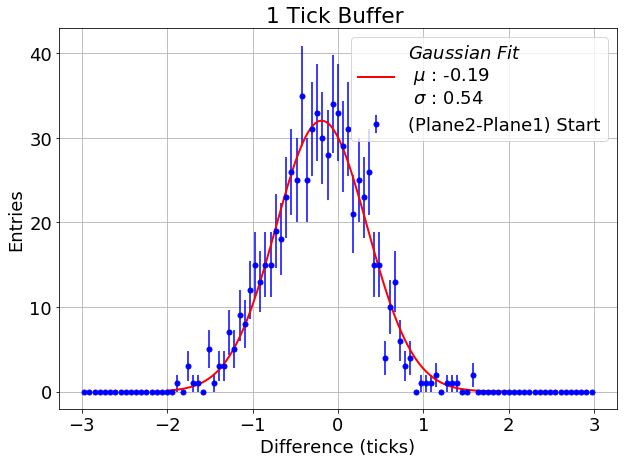

In [18]:
fig = plt.figure(figsize=(10,7))

# draw data-points
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='b',markersize=5,label='(Plane2-Plane1) Start')
# draw fitted curve
xvals = np.linspace(xmin,xmax,100)
plt.plot(xvals,gauss(xvals,*popt),'r-',lw=2,label='$Gaussian \ Fit$ \n $\mu$ : %.02f  \n $\sigma$ : %.02f '%(popt[1],abs(popt[2])))

plt.grid(True)
plt.xlabel('Difference (ticks)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.title("1 Tick Buffer ")
plt.show()
fig.savefig('1gaus21_start.png', dpi=400)

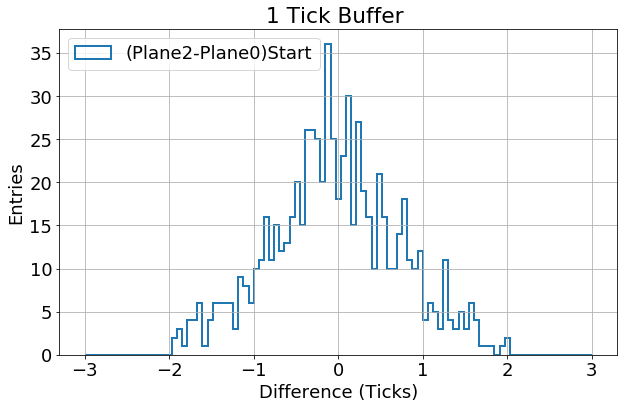

In [19]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-3,3,100)
plt.hist((df_final_1tick_start['start_tick_cluster2']-df_final_1tick_start['start_tick_cluster0']).values,bins=BINS,histtype='step',lw=2,label='(Plane2-Plane0)Start')
plt.title("1 Tick Buffer ")
plt.xlabel('Difference (Ticks)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()

In [20]:
fig = plt.figure(figsize=(8,8))
binv, bine = np.histogram((df_final_1tick_start['start_tick_cluster2']-df_final_1tick_start['start_tick_cluster0']).values,bins=BINS)
binc = (0.5)*(bine[1:]+bine[:-1])
binv = binv.astype(float) 
errors = np.sqrt(binv)
#plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)

#plt.show()


BINWIDTH = binc[1]-binc[0]

<Figure size 576x576 with 0 Axes>

In [21]:
guess = [np.sum(binv), -0.0, 0.65]
xmin = -2 # minimum bin entry 
xmax = 2 # maximum bin entry:

In [22]:
popt,popv = curve_fit(gauss,binc,binv)#,p0=guess)

In [23]:
print popt

[23.15423336 -0.0502334  -0.72919531]


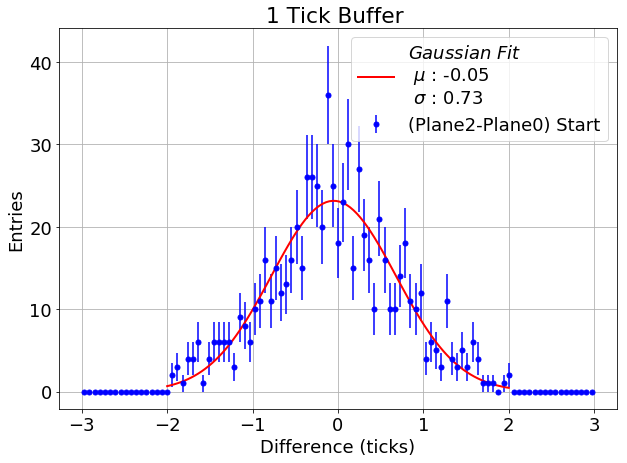

In [24]:
fig = plt.figure(figsize=(10,7))

# draw data-points
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='b',markersize=5,label='(Plane2-Plane0) Start')
# draw fitted curve
xvals = np.linspace(xmin,xmax,100)
plt.plot(xvals,gauss(xvals,*popt),'r-',lw=2,label='$Gaussian \ Fit$ \n $\mu$ : %.02f  \n $\sigma$ : %.02f '%(popt[1],abs(popt[2])))

plt.grid(True)
plt.xlabel('Difference (ticks)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.title("1 Tick Buffer ")
plt.show()
fig.savefig('1gaus20_start.png', dpi=400)

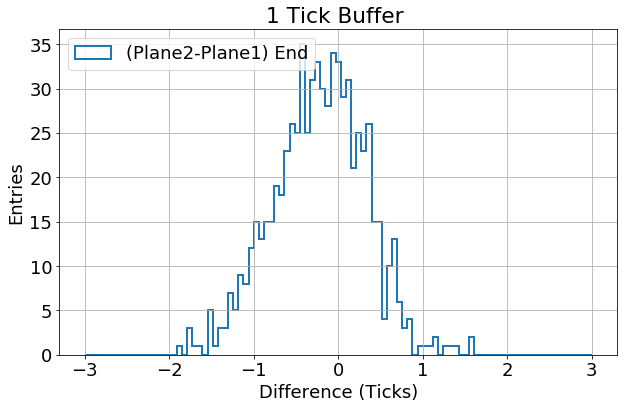

In [25]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-3,3,100)
plt.hist((df_final_1tick_end['end_tick_cluster2']-df_final_1tick_end['end_tick_cluster1']).values,bins=BINS,histtype='step',lw=2,label='(Plane2-Plane1) End')
plt.title("1 Tick Buffer ")
plt.xlabel('Difference (Ticks)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()

In [26]:
fig = plt.figure(figsize=(8,8))
binv, bine = np.histogram((df_final_1tick_end['end_tick_cluster2']-df_final_1tick_end['end_tick_cluster1']).values,bins=BINS)
binc = (0.5)*(bine[1:]+bine[:-1])
binv = binv.astype(float) 
errors = np.sqrt(binv)
#plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)

#plt.show()


BINWIDTH = binc[1]-binc[0]

<Figure size 576x576 with 0 Axes>

In [27]:
guess = [np.sum(binv), -0.0, 0.65]
xmin = -2 # minimum bin entry 
xmax = 2 # maximum bin entry:

In [28]:
popt,popv = curve_fit(gauss,binc,binv)#,p0=guess)

In [29]:
print popt

[32.04464648 -0.19092427  0.535491  ]


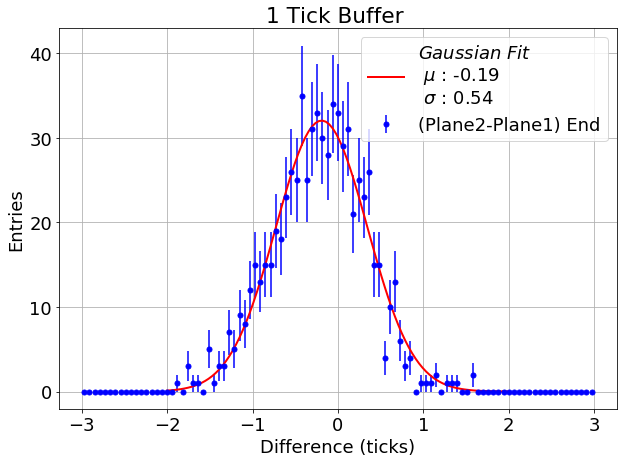

In [30]:
fig = plt.figure(figsize=(10,7))

# draw data-points
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='b',markersize=5,label='(Plane2-Plane1) End')
# draw fitted curve
xvals = np.linspace(xmin,xmax,100)
plt.plot(xvals,gauss(xvals,*popt),'r-',lw=2,label='$Gaussian \ Fit$ \n $\mu$ : %.02f  \n $\sigma$ : %.02f '%(popt[1],abs(popt[2])))

plt.grid(True)
plt.xlabel('Difference (ticks)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.title("1 Tick Buffer ")
plt.show()
fig.savefig('1gaus21_end.png', dpi=400)

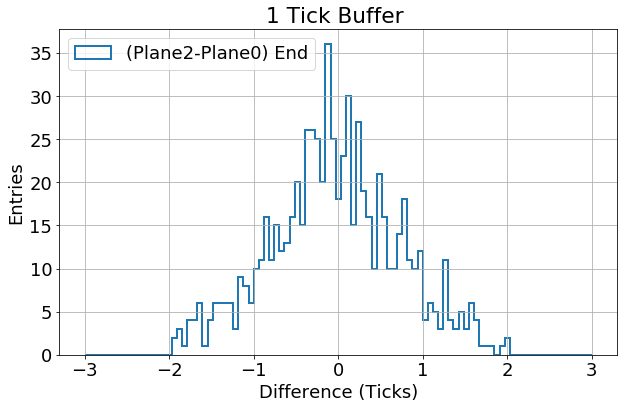

In [31]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-3,3,100)
plt.hist((df_final_1tick_end['end_tick_cluster2']-df_final_1tick_end['end_tick_cluster0']).values,bins=BINS,histtype='step',lw=2,label='(Plane2-Plane0) End')
plt.title("1 Tick Buffer ")
plt.xlabel('Difference (Ticks)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()

In [32]:
fig = plt.figure(figsize=(8,8))
binv, bine = np.histogram((df_final_1tick_end['end_tick_cluster2']-df_final_1tick_end['end_tick_cluster0']).values,bins=BINS)
binc = (0.5)*(bine[1:]+bine[:-1])
binv = binv.astype(float) 
errors = np.sqrt(binv)
#plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)

#plt.show()


BINWIDTH = binc[1]-binc[0]

<Figure size 576x576 with 0 Axes>

In [33]:
guess = [np.sum(binv), -0.0, 0.65]
xmin = -2 # minimum bin entry 
xmax = 2 # maximum bin entry:

In [34]:
popt,popv = curve_fit(gauss,binc,binv)#,p0=guess)

In [35]:
print popt

[23.15423336 -0.0502334  -0.72919531]


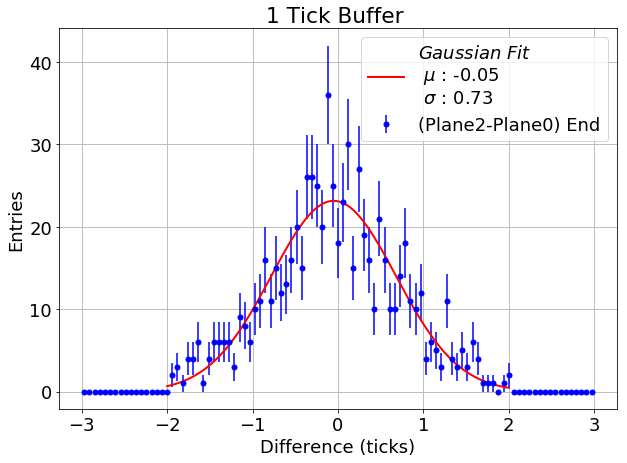

In [36]:
fig = plt.figure(figsize=(10,7))

# draw data-points
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='b',markersize=5,label='(Plane2-Plane0) End')
# draw fitted curve
xvals = np.linspace(xmin,xmax,100)
plt.plot(xvals,gauss(xvals,*popt),'r-',lw=2,label='$Gaussian \ Fit$ \n $\mu$ : %.02f  \n $\sigma$ : %.02f '%(popt[1],abs(popt[2])))

plt.grid(True)
plt.xlabel('Difference (ticks)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.title("1 Tick Buffer ")
plt.show()
fig.savefig('1gaus20_end.png', dpi=400)

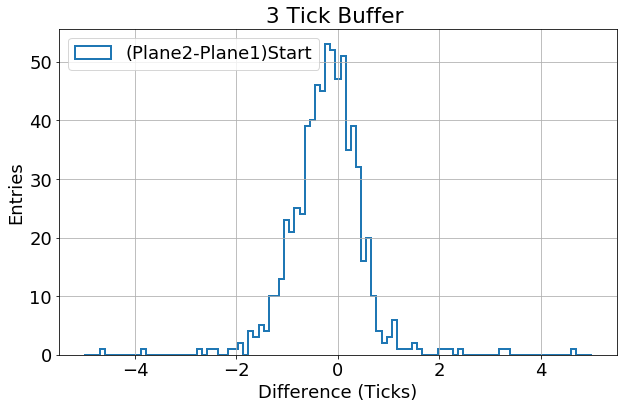

In [37]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-5,5,100)
plt.hist((df_final_3tick_start['start_tick_cluster2']-df_final_3tick_start['start_tick_cluster1']).values,bins=BINS,histtype='step',lw=2,label='(Plane2-Plane1)Start')
plt.title("3 Tick Buffer ")
plt.xlabel('Difference (Ticks)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()

In [38]:
#fig = plt.figure(figsize=(8,8))
binv, bine = np.histogram((df_final_3tick_start['start_tick_cluster2']-df_final_3tick_start['start_tick_cluster1']).values,bins=BINS)
binc = (0.5)*(bine[1:]+bine[:-1])
binv = binv.astype(float) 
errors = np.sqrt(binv)
#plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)

#plt.show()


BINWIDTH = binc[1]-binc[0]

In [39]:
guess = [np.sum(binv), -0.0, 0.65]
xmin = -2 # minimum bin entry 
xmax = 2 # maximum bin entry:

In [40]:
popt,popv = curve_fit(gauss,binc,binv)#,p0=guess)

In [41]:
print popt

[50.59852409 -0.18390013  0.5423507 ]


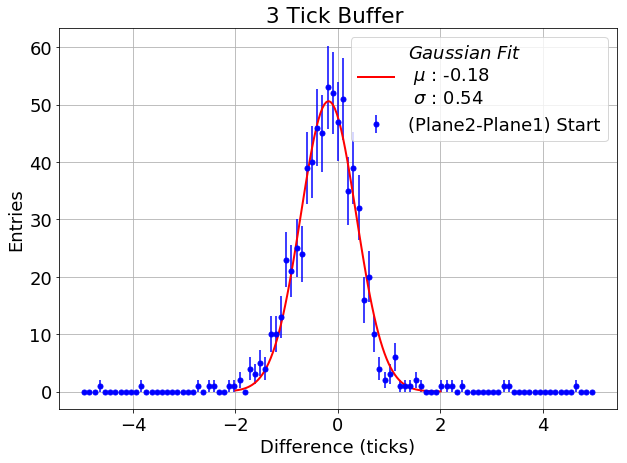

In [42]:
fig = plt.figure(figsize=(10,7))

# draw data-points
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='b',markersize=5,label='(Plane2-Plane1) Start')
# draw fitted curve
xvals = np.linspace(xmin,xmax,100)
plt.plot(xvals,gauss(xvals,*popt),'r-',lw=2,label='$Gaussian \ Fit$ \n $\mu$ : %.02f  \n $\sigma$ : %.02f '%(popt[1],abs(popt[2])))

plt.grid(True)
plt.xlabel('Difference (ticks)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.title("3 Tick Buffer ")
plt.show()
fig.savefig('3gaus21_start.png', dpi=400)

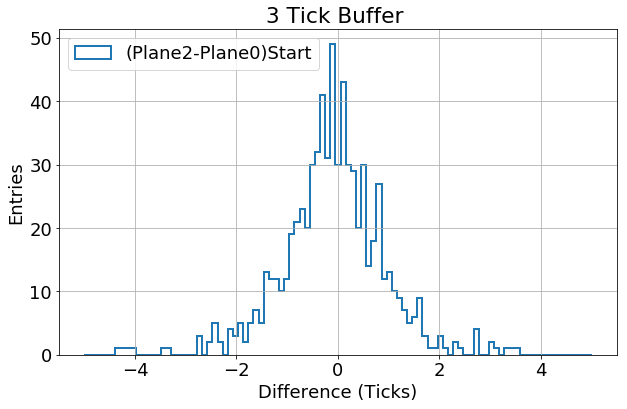

In [43]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-5,5,100)
plt.hist((df_final_3tick_start['start_tick_cluster2']-df_final_3tick_start['start_tick_cluster0']).values,bins=BINS,histtype='step',lw=2,label='(Plane2-Plane0)Start')
plt.title("3 Tick Buffer ")
plt.xlabel('Difference (Ticks)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()

In [44]:
#fig = plt.figure(figsize=(8,8))
binv, bine = np.histogram((df_final_3tick_start['start_tick_cluster2']-df_final_3tick_start['start_tick_cluster0']).values,bins=BINS)
binc = (0.5)*(bine[1:]+bine[:-1])
binv = binv.astype(float) 
errors = np.sqrt(binv)
#plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)

#plt.show()


BINWIDTH = binc[1]-binc[0]

In [45]:
guess = [np.sum(binv), -0.0, 0.65]
xmin = -2 # minimum bin entry 
xmax = 2 # maximum bin entry:

In [46]:
popt,popv = curve_fit(gauss,binc,binv)#,p0=guess)

In [47]:
print popt

[35.06372954 -0.07763564 -0.76163403]


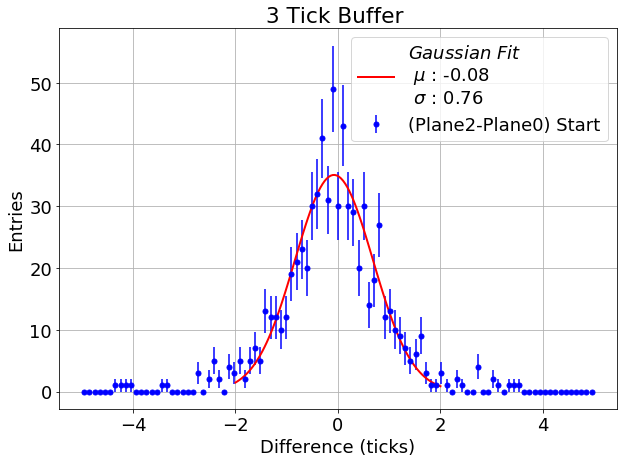

In [48]:
fig = plt.figure(figsize=(10,7))

# draw data-points
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='b',markersize=5,label='(Plane2-Plane0) Start')
# draw fitted curve
xvals = np.linspace(xmin,xmax,100)
plt.plot(xvals,gauss(xvals,*popt),'r-',lw=2,label='$Gaussian \ Fit$ \n $\mu$ : %.02f  \n $\sigma$ : %.02f '%(popt[1],abs(popt[2])))

plt.grid(True)
plt.xlabel('Difference (ticks)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.title("3 Tick Buffer ")
plt.show()
fig.savefig('3gaus20_start.png', dpi=400)

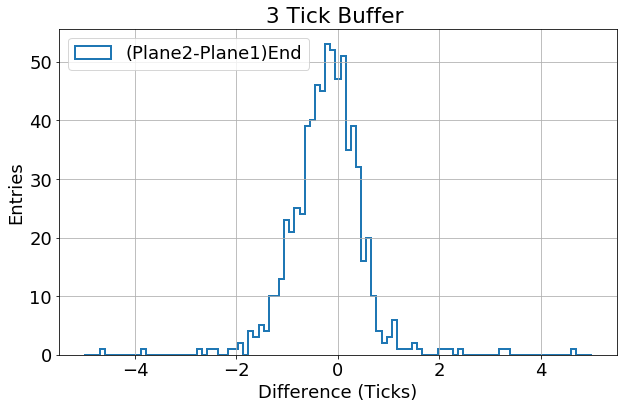

In [49]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-5,5,100)
plt.hist((df_final_3tick_end['end_tick_cluster2']-df_final_3tick_end['end_tick_cluster1']).values,bins=BINS,histtype='step',lw=2,label='(Plane2-Plane1)End')
plt.title("3 Tick Buffer ")
plt.xlabel('Difference (Ticks)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()

In [50]:
#fig = plt.figure(figsize=(8,8))
binv, bine = np.histogram((df_final_3tick_end['end_tick_cluster2']-df_final_3tick_end['end_tick_cluster1']).values,bins=BINS)
binc = (0.5)*(bine[1:]+bine[:-1])
binv = binv.astype(float) 
errors = np.sqrt(binv)
#plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)

#plt.show()


BINWIDTH = binc[1]-binc[0]

In [51]:
guess = [np.sum(binv), -0.0, 0.65]
xmin = -2 # minimum bin entry 
xmax = 2 # maximum bin entry:

In [52]:
popt,popv = curve_fit(gauss,binc,binv)#,p0=guess)

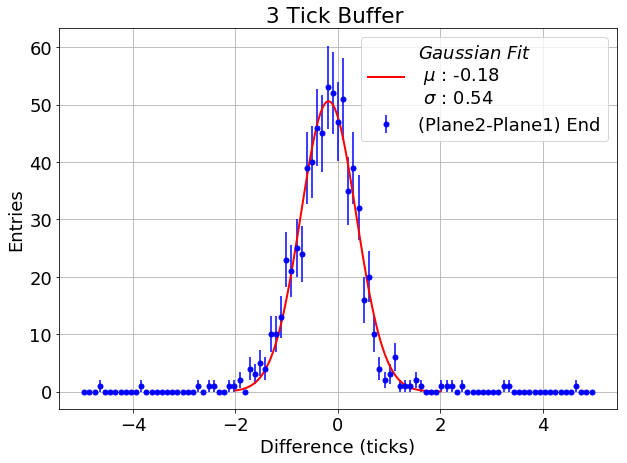

In [53]:
fig = plt.figure(figsize=(10,7))

# draw data-points
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='b',markersize=5,label='(Plane2-Plane1) End')
# draw fitted curve
xvals = np.linspace(xmin,xmax,100)
plt.plot(xvals,gauss(xvals,*popt),'r-',lw=2,label='$Gaussian \ Fit$ \n $\mu$ : %.02f  \n $\sigma$ : %.02f '%(popt[1],abs(popt[2])))

plt.grid(True)
plt.xlabel('Difference (ticks)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.title("3 Tick Buffer ")
plt.show()
fig.savefig('3gaus21_end.png', dpi=400)

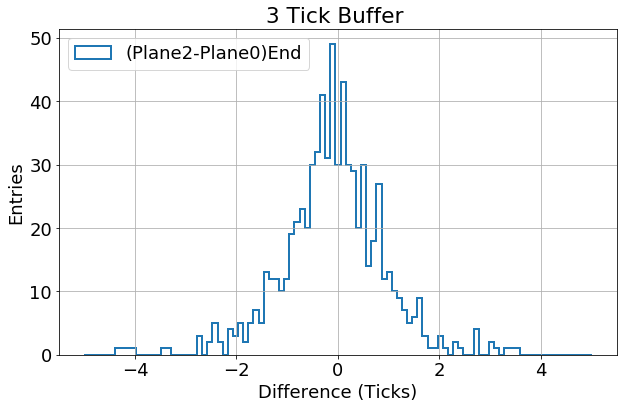

In [54]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-5,5,100)
plt.hist((df_final_3tick_end['end_tick_cluster2']-df_final_3tick_end['end_tick_cluster0']).values,bins=BINS,histtype='step',lw=2,label='(Plane2-Plane0)End')
plt.title("3 Tick Buffer ")
plt.xlabel('Difference (Ticks)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()

In [55]:
#fig = plt.figure(figsize=(8,8))
binv, bine = np.histogram((df_final_3tick_end['end_tick_cluster2']-df_final_3tick_end['end_tick_cluster0']).values,bins=BINS)
binc = (0.5)*(bine[1:]+bine[:-1])
binv = binv.astype(float) 
errors = np.sqrt(binv)
#plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)

#plt.show()


BINWIDTH = binc[1]-binc[0]

In [56]:
guess = [np.sum(binv), -0.0, 0.65]
xmin = -2 # minimum bin entry 
xmax = 2 # maximum bin entry:

In [57]:
popt,popv = curve_fit(gauss,binc,binv)#,p0=guess)

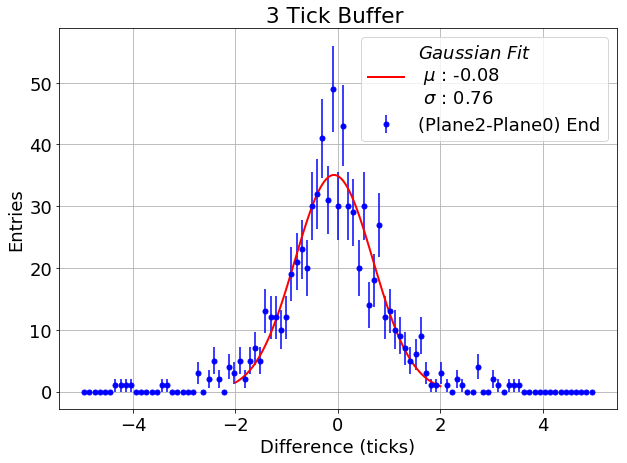

In [58]:
fig = plt.figure(figsize=(10,7))

# draw data-points
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='b',markersize=5,label='(Plane2-Plane0) End')
# draw fitted curve
xvals = np.linspace(xmin,xmax,100)
plt.plot(xvals,gauss(xvals,*popt),'r-',lw=2,label='$Gaussian \ Fit$ \n $\mu$ : %.02f  \n $\sigma$ : %.02f '%(popt[1],abs(popt[2])))

plt.grid(True)
plt.xlabel('Difference (ticks)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.title("3 Tick Buffer ")
plt.show()
fig.savefig('3gaus20_end.png')

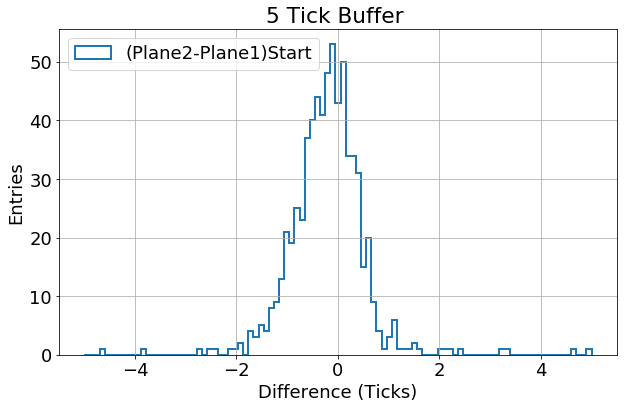

In [59]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-5,5,100)
plt.hist((df_final_5tick_start['start_tick_cluster2']-df_final_5tick_start['start_tick_cluster1']).values,bins=BINS,histtype='step',lw=2,label='(Plane2-Plane1)Start')
plt.title("5 Tick Buffer ")
plt.xlabel('Difference (Ticks)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()



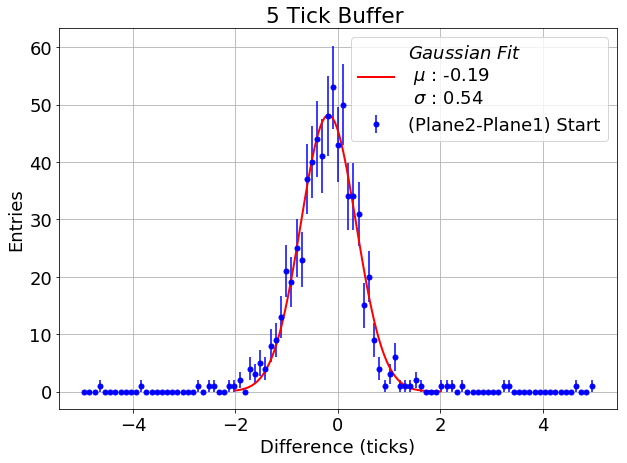

In [60]:
binv, bine = np.histogram((df_final_5tick_start['start_tick_cluster2']-df_final_5tick_start['start_tick_cluster1']).values,bins=BINS)
binc = (0.5)*(bine[1:]+bine[:-1])
binv = binv.astype(float) 
errors = np.sqrt(binv)
#plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)

#plt.show()


BINWIDTH = binc[1]-binc[0]


guess = [np.sum(binv), -0.0, 0.65]
xmin = -2 # minimum bin entry 
xmax = 2 # maximum bin entry:


popt,popv = curve_fit(gauss,binc,binv)#,p0=guess)

fig = plt.figure(figsize=(10,7))

# draw data-points
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='b',markersize=5,label='(Plane2-Plane1) Start')
# draw fitted curve
xvals = np.linspace(xmin,xmax,100)
plt.plot(xvals,gauss(xvals,*popt),'r-',lw=2,label='$Gaussian \ Fit$ \n $\mu$ : %.02f  \n $\sigma$ : %.02f '%(popt[1],abs(popt[2])))

plt.grid(True)
plt.xlabel('Difference (ticks)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.title("5 Tick Buffer ")
plt.show()
fig.savefig('5gaus21_start.png')



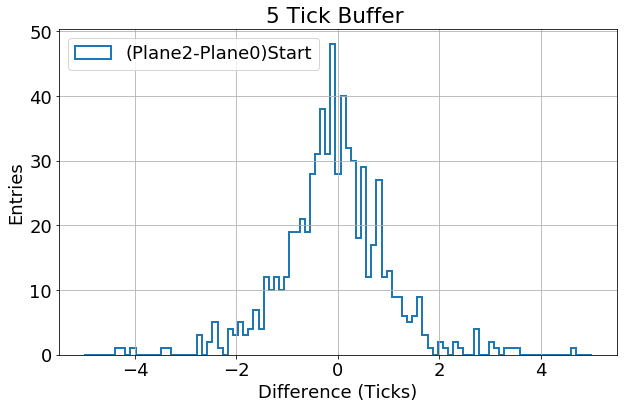

In [61]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-5,5,100)
plt.hist((df_final_5tick_start['start_tick_cluster2']-df_final_5tick_start['start_tick_cluster0']).values,bins=BINS,histtype='step',lw=2,label='(Plane2-Plane0)Start')
plt.title("5 Tick Buffer ")
plt.xlabel('Difference (Ticks)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()

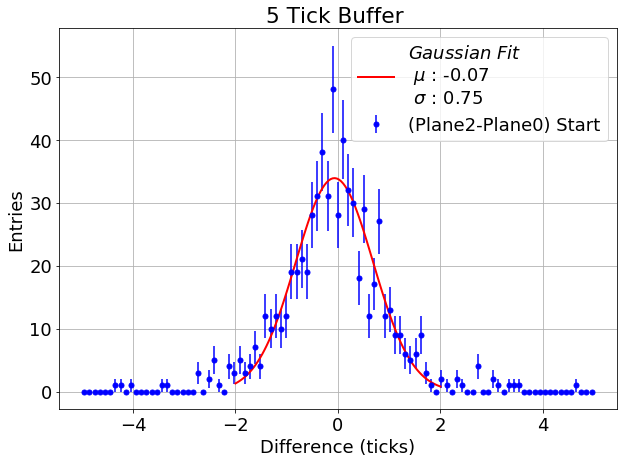

In [62]:
binv, bine = np.histogram((df_final_5tick_start['start_tick_cluster2']-df_final_5tick_start['start_tick_cluster0']).values,bins=BINS)
binc = (0.5)*(bine[1:]+bine[:-1])
binv = binv.astype(float) 
errors = np.sqrt(binv)
#plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)

#plt.show()


BINWIDTH = binc[1]-binc[0]


guess = [np.sum(binv), -0.0, 0.65]
xmin = -2 # minimum bin entry 
xmax = 2 # maximum bin entry:


popt,popv = curve_fit(gauss,binc,binv)#,p0=guess)

fig = plt.figure(figsize=(10,7))

# draw data-points
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='b',markersize=5,label='(Plane2-Plane0) Start')
# draw fitted curve
xvals = np.linspace(xmin,xmax,100)
plt.plot(xvals,gauss(xvals,*popt),'r-',lw=2,label='$Gaussian \ Fit$ \n $\mu$ : %.02f  \n $\sigma$ : %.02f '%(popt[1],abs(popt[2])))

plt.grid(True)
plt.xlabel('Difference (ticks)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.title("5 Tick Buffer ")
plt.show()
fig.savefig('5gaus20_start.png')



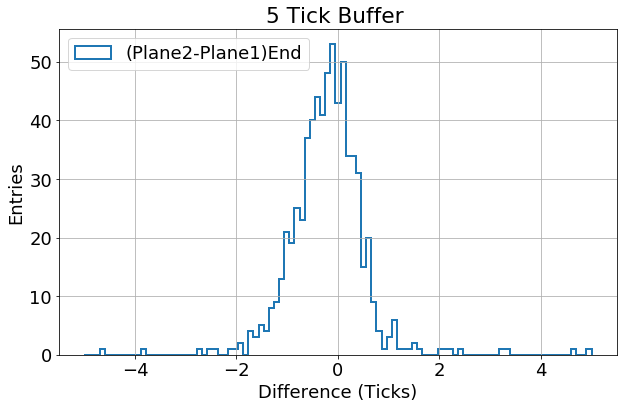

In [63]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-5,5,100)
plt.hist((df_final_5tick_end['end_tick_cluster2']-df_final_5tick_end['end_tick_cluster1']).values,bins=BINS,histtype='step',lw=2,label='(Plane2-Plane1)End')
plt.title("5 Tick Buffer ")
plt.xlabel('Difference (Ticks)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()

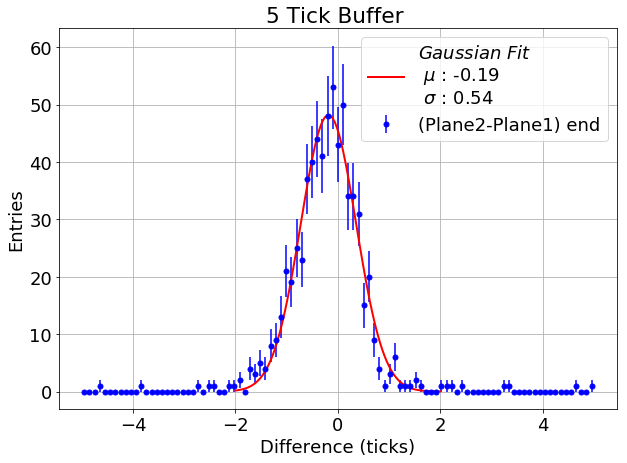

In [64]:
binv, bine = np.histogram((df_final_5tick_end['end_tick_cluster2']-df_final_5tick_end['end_tick_cluster1']).values,bins=BINS)
binc = (0.5)*(bine[1:]+bine[:-1])
binv = binv.astype(float) 
errors = np.sqrt(binv)
#plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)

#plt.show()


BINWIDTH = binc[1]-binc[0]


guess = [np.sum(binv), -0.0, 0.65]
xmin = -2 # minimum bin entry 
xmax = 2 # maximum bin entry:


popt,popv = curve_fit(gauss,binc,binv)#,p0=guess)

fig = plt.figure(figsize=(10,7))

# draw data-points
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='b',markersize=5,label='(Plane2-Plane1) end')
# draw fitted curve
xvals = np.linspace(xmin,xmax,100)
plt.plot(xvals,gauss(xvals,*popt),'r-',lw=2,label='$Gaussian \ Fit$ \n $\mu$ : %.02f  \n $\sigma$ : %.02f '%(popt[1],abs(popt[2])))

plt.grid(True)
plt.xlabel('Difference (ticks)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.title("5 Tick Buffer ")
plt.show()
fig.savefig('5gaus21_end.png')



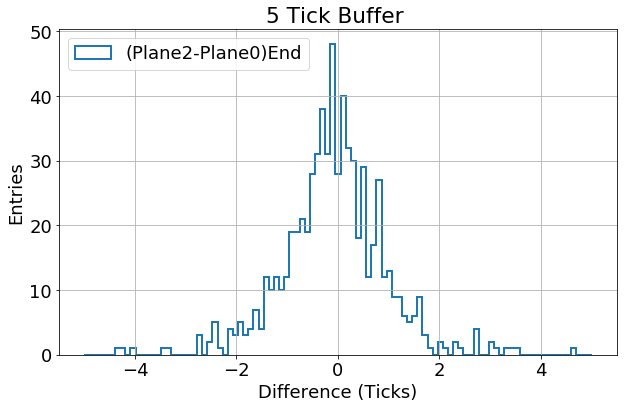

In [65]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-5,5,100)
plt.hist((df_final_5tick_end['end_tick_cluster2']-df_final_5tick_end['end_tick_cluster0']).values,bins=BINS,histtype='step',lw=2,label='(Plane2-Plane0)End')
plt.title("5 Tick Buffer ")
plt.xlabel('Difference (Ticks)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()

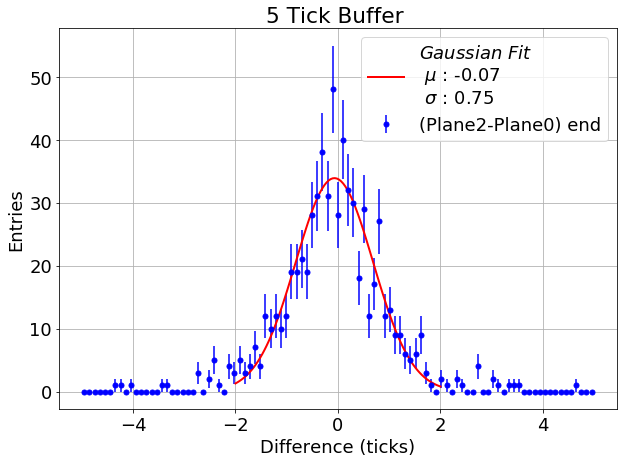

In [66]:
binv, bine = np.histogram((df_final_5tick_end['end_tick_cluster2']-df_final_5tick_end['end_tick_cluster0']).values,bins=BINS)
binc = (0.5)*(bine[1:]+bine[:-1])
binv = binv.astype(float) 
errors = np.sqrt(binv)
#plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)

#plt.show()


BINWIDTH = binc[1]-binc[0]


guess = [np.sum(binv), -0.0, 0.65]
xmin = -2 # minimum bin entry 
xmax = 2 # maximum bin entry:


popt,popv = curve_fit(gauss,binc,binv)#,p0=guess)

fig = plt.figure(figsize=(10,7))

# draw data-points
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='b',markersize=5,label='(Plane2-Plane0) end')
# draw fitted curve
xvals = np.linspace(xmin,xmax,100)
plt.plot(xvals,gauss(xvals,*popt),'r-',lw=2,label='$Gaussian \ Fit$ \n $\mu$ : %.02f  \n $\sigma$ : %.02f '%(popt[1],abs(popt[2])))

plt.grid(True)
plt.xlabel('Difference (ticks)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.title("5 Tick Buffer ")
plt.show()
fig.savefig('5gaus20_end.png')



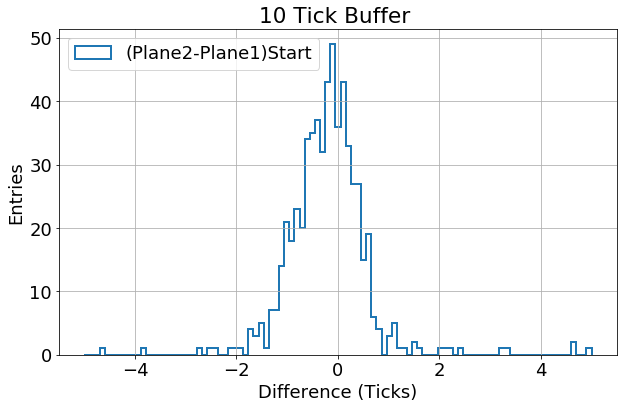

In [67]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-5,5,100)
plt.hist((df_final_10tick_start['start_tick_cluster2']-df_final_10tick_start['start_tick_cluster1']).values,bins=BINS,histtype='step',lw=2,label='(Plane2-Plane1)Start')
plt.title("10 Tick Buffer ")
plt.xlabel('Difference (Ticks)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()

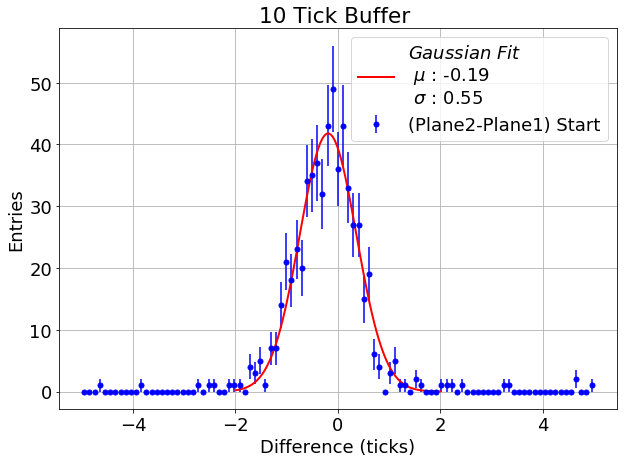

In [68]:
binv, bine = np.histogram((df_final_10tick_start['start_tick_cluster2']-df_final_10tick_start['start_tick_cluster1']).values,bins=BINS)
binc = (0.5)*(bine[1:]+bine[:-1])
binv = binv.astype(float) 
errors = np.sqrt(binv)
#plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)

#plt.show()


BINWIDTH = binc[1]-binc[0]


guess = [np.sum(binv), -0.0, 0.65]
xmin = -2 # minimum bin entry 
xmax = 2 # maximum bin entry:


popt,popv = curve_fit(gauss,binc,binv)#,p0=guess)

fig = plt.figure(figsize=(10,7))

# draw data-points
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='b',markersize=5,label='(Plane2-Plane1) Start')
# draw fitted curve
xvals = np.linspace(xmin,xmax,100)
plt.plot(xvals,gauss(xvals,*popt),'r-',lw=2,label='$Gaussian \ Fit$ \n $\mu$ : %.02f  \n $\sigma$ : %.02f '%(popt[1],abs(popt[2])))

plt.grid(True)
plt.xlabel('Difference (ticks)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.title("10 Tick Buffer ")
plt.show()
fig.savefig('10gaus21_start.png')



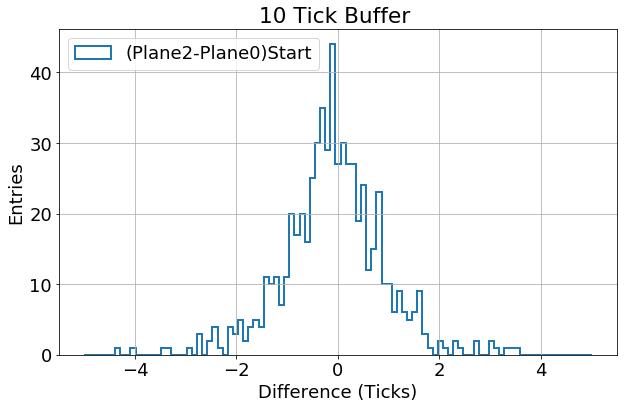

In [69]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-5,5,100)
plt.hist((df_final_10tick_start['start_tick_cluster2']-df_final_10tick_start['start_tick_cluster0']).values,bins=BINS,histtype='step',lw=2,label='(Plane2-Plane0)Start')
plt.title("10 Tick Buffer ")
plt.xlabel('Difference (Ticks)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()

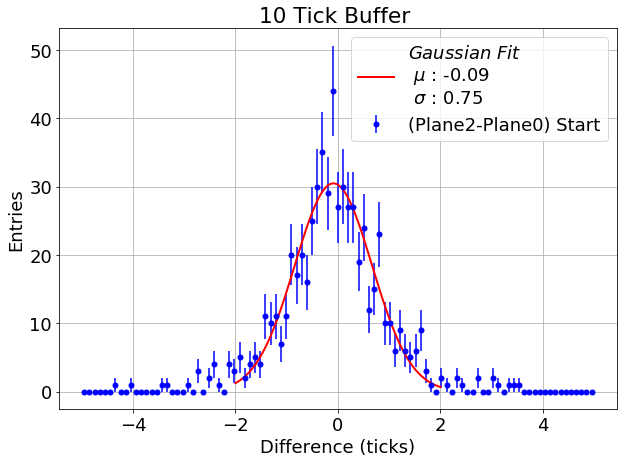

In [70]:
binv, bine = np.histogram((df_final_10tick_start['start_tick_cluster2']-df_final_10tick_start['start_tick_cluster0']).values,bins=BINS)
binc = (0.5)*(bine[1:]+bine[:-1])
binv = binv.astype(float) 
errors = np.sqrt(binv)
#plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)

#plt.show()


BINWIDTH = binc[1]-binc[0]


guess = [np.sum(binv), -0.0, 0.65]
xmin = -2 # minimum bin entry 
xmax = 2 # maximum bin entry:


popt,popv = curve_fit(gauss,binc,binv)#,p0=guess)

fig = plt.figure(figsize=(10,7))

# draw data-points
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='b',markersize=5,label='(Plane2-Plane0) Start')
# draw fitted curve
xvals = np.linspace(xmin,xmax,100)
plt.plot(xvals,gauss(xvals,*popt),'r-',lw=2,label='$Gaussian \ Fit$ \n $\mu$ : %.02f  \n $\sigma$ : %.02f '%(popt[1],abs(popt[2])))

plt.grid(True)
plt.xlabel('Difference (ticks)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.title("10 Tick Buffer ")
plt.show()
fig.savefig('10gaus20_start.png')



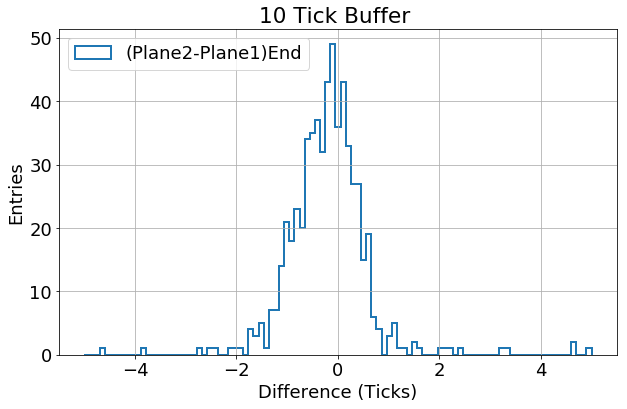

In [71]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-5,5,100)
plt.hist((df_final_10tick_end['end_tick_cluster2']-df_final_10tick_end['end_tick_cluster1']).values,bins=BINS,histtype='step',lw=2,label='(Plane2-Plane1)End')
plt.title("10 Tick Buffer ")
plt.xlabel('Difference (Ticks)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()

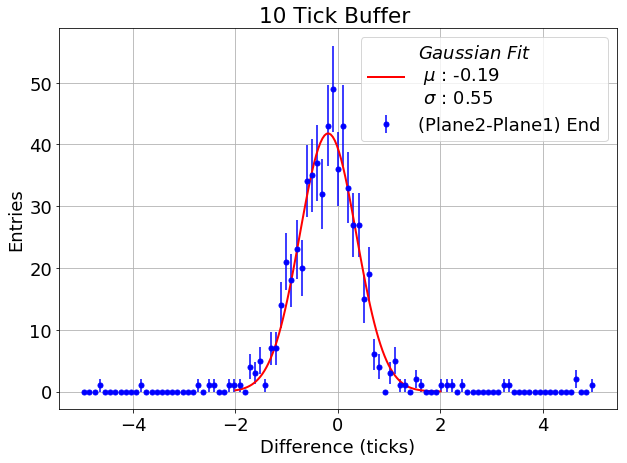

In [72]:
binv, bine = np.histogram((df_final_10tick_end['end_tick_cluster2']-df_final_10tick_end['end_tick_cluster1']).values,bins=BINS)
binc = (0.5)*(bine[1:]+bine[:-1])
binv = binv.astype(float) 
errors = np.sqrt(binv)
#plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)

#plt.show()


BINWIDTH = binc[1]-binc[0]


guess = [np.sum(binv), -0.0, 0.65]
xmin = -2 # minimum bin entry 
xmax = 2 # maximum bin entry:


popt,popv = curve_fit(gauss,binc,binv)#,p0=guess)

fig = plt.figure(figsize=(10,7))

# draw data-points
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='b',markersize=5,label='(Plane2-Plane1) End')
# draw fitted curve
xvals = np.linspace(xmin,xmax,100)
plt.plot(xvals,gauss(xvals,*popt),'r-',lw=2,label='$Gaussian \ Fit$ \n $\mu$ : %.02f  \n $\sigma$ : %.02f '%(popt[1],abs(popt[2])))

plt.grid(True)
plt.xlabel('Difference (ticks)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.title("10 Tick Buffer ")
plt.show()
fig.savefig('10gaus21_end.png')

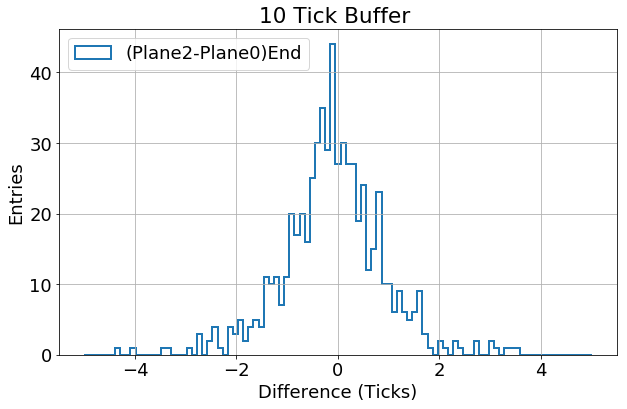

In [73]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-5,5,100)
plt.hist((df_final_10tick_end['end_tick_cluster2']-df_final_10tick_end['end_tick_cluster0']).values,bins=BINS,histtype='step',lw=2,label='(Plane2-Plane0)End')
plt.title("10 Tick Buffer ")
plt.xlabel('Difference (Ticks)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()

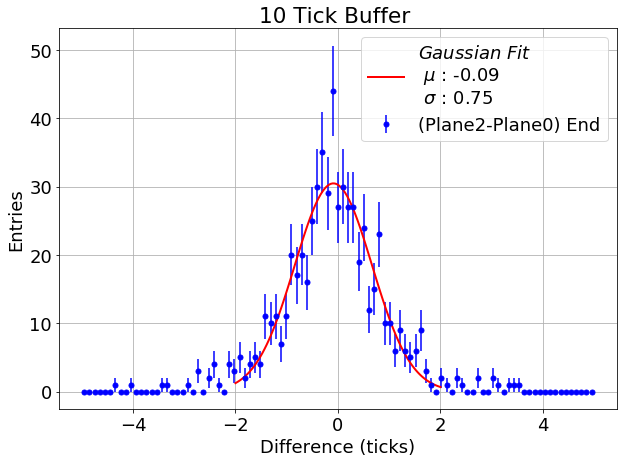

In [74]:
binv, bine = np.histogram((df_final_10tick_end['end_tick_cluster2']-df_final_10tick_end['end_tick_cluster0']).values,bins=BINS)
binc = (0.5)*(bine[1:]+bine[:-1])
binv = binv.astype(float) 
errors = np.sqrt(binv)
#plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)

#plt.show()


BINWIDTH = binc[1]-binc[0]


guess = [np.sum(binv), -0.0, 0.65]
xmin = -2 # minimum bin entry 
xmax = 2 # maximum bin entry:


popt,popv = curve_fit(gauss,binc,binv)#,p0=guess)

fig = plt.figure(figsize=(10,7))

# draw data-points
plt.errorbar(binc,binv,yerr=errors,fmt='o',color='b',markersize=5,label='(Plane2-Plane0) End')
# draw fitted curve
xvals = np.linspace(xmin,xmax,100)
plt.plot(xvals,gauss(xvals,*popt),'r-',lw=2,label='$Gaussian \ Fit$ \n $\mu$ : %.02f  \n $\sigma$ : %.02f '%(popt[1],abs(popt[2])))

plt.grid(True)
plt.xlabel('Difference (ticks)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.title("10 Tick Buffer ")
plt.show()
fig.savefig('10gaus20_end.png')

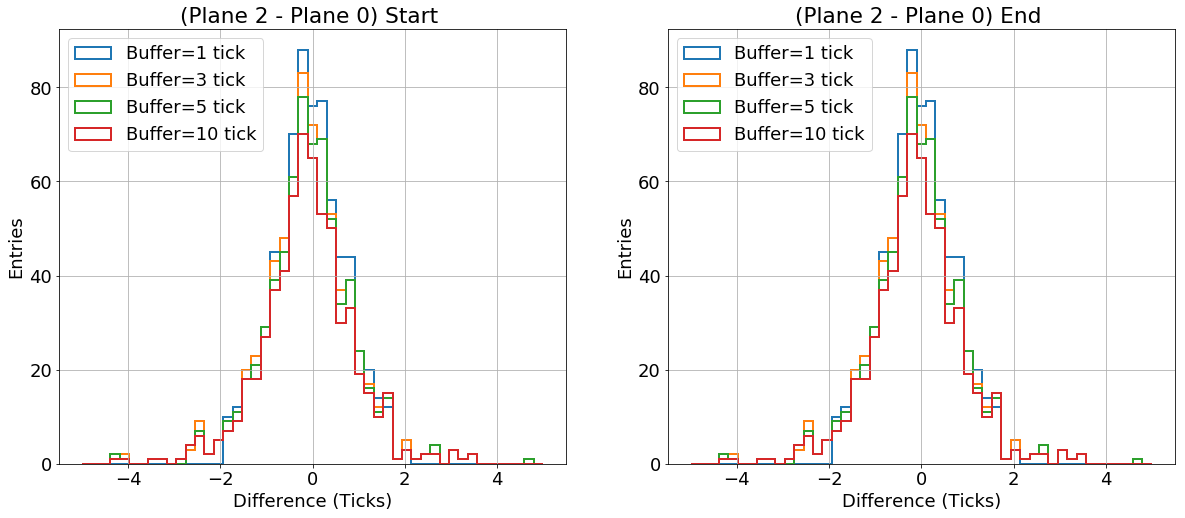

In [75]:
fig = plt.figure(figsize=(20,8))
BINS = np.linspace(-5,5,50)
plt.subplot(1, 2, 1)
plt.hist((df_final_1tick_start['start_tick_cluster2']-df_final_1tick_start['start_tick_cluster0']).values,bins=BINS,histtype='step',lw=2,label='Buffer=1 tick')
plt.hist((df_final_3tick_start['start_tick_cluster2']-df_final_3tick_start['start_tick_cluster0']).values,bins=BINS,histtype='step',lw=2,label='Buffer=3 tick')
plt.hist((df_final_5tick_start['start_tick_cluster2']-df_final_5tick_start['start_tick_cluster0']).values,bins=BINS,histtype='step',lw=2,label='Buffer=5 tick')
plt.hist((df_final_10tick_start['start_tick_cluster2']-df_final_10tick_start['start_tick_cluster0']).values,bins=BINS,histtype='step',lw=2,label='Buffer=10 tick')
plt.title("(Plane 2 - Plane 0) Start ")
plt.xlabel('Difference (Ticks)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)

plt.subplot(1, 2, 2)
plt.hist((df_final_1tick_end['end_tick_cluster2']-df_final_1tick_end['end_tick_cluster0']).values,bins=BINS,histtype='step',lw=2,label='Buffer=1 tick')
plt.hist((df_final_3tick_end['end_tick_cluster2']-df_final_3tick_end['end_tick_cluster0']).values,bins=BINS,histtype='step',lw=2,label='Buffer=3 tick')
plt.hist((df_final_5tick_end['end_tick_cluster2']-df_final_5tick_end['end_tick_cluster0']).values,bins=BINS,histtype='step',lw=2,label='Buffer=5 tick')
plt.hist((df_final_10tick_end['end_tick_cluster2']-df_final_10tick_end['end_tick_cluster0']).values,bins=BINS,histtype='step',lw=2,label='Buffer=10 tick')
plt.title("(Plane 2 - Plane 0) End ")
plt.xlabel('Difference (Ticks)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()
fig.savefig('Plane20.png', dpi=300)

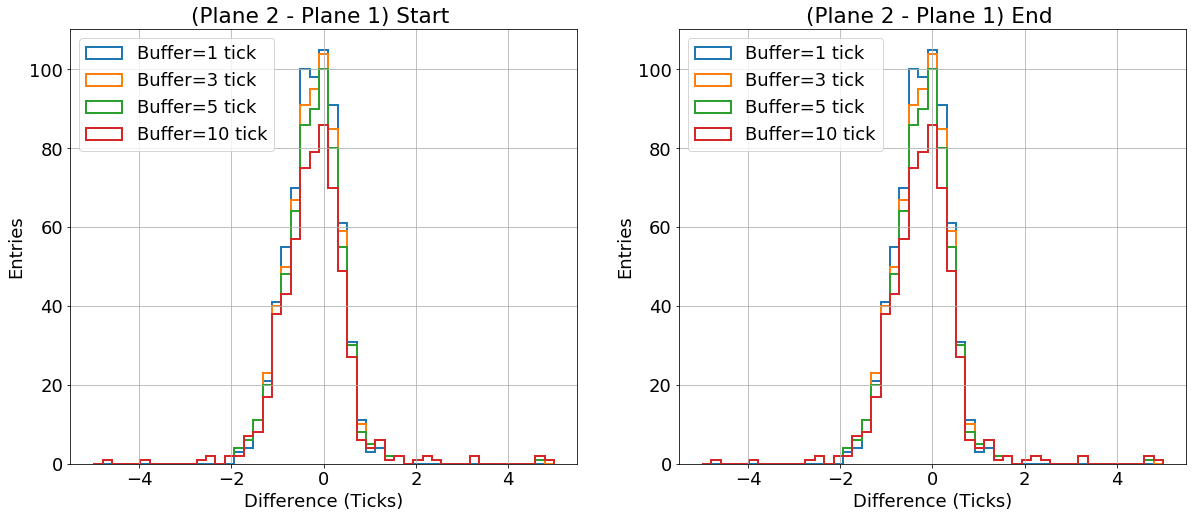

In [76]:
fig = plt.figure(figsize=(20,8))
BINS = np.linspace(-5,5,50)
plt.subplot(1, 2, 1)
plt.hist((df_final_1tick_start['start_tick_cluster2']-df_final_1tick_start['start_tick_cluster1']).values,bins=BINS,histtype='step',lw=2,label='Buffer=1 tick')
plt.hist((df_final_3tick_start['start_tick_cluster2']-df_final_3tick_start['start_tick_cluster1']).values,bins=BINS,histtype='step',lw=2,label='Buffer=3 tick')
plt.hist((df_final_5tick_start['start_tick_cluster2']-df_final_5tick_start['start_tick_cluster1']).values,bins=BINS,histtype='step',lw=2,label='Buffer=5 tick')
plt.hist((df_final_10tick_start['start_tick_cluster2']-df_final_10tick_start['start_tick_cluster1']).values,bins=BINS,histtype='step',lw=2,label='Buffer=10 tick')
plt.title("(Plane 2 - Plane 1) Start ")
plt.xlabel('Difference (Ticks)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)

plt.subplot(1, 2, 2)
plt.hist((df_final_1tick_end['end_tick_cluster2']-df_final_1tick_end['end_tick_cluster1']).values,bins=BINS,histtype='step',lw=2,label='Buffer=1 tick')
plt.hist((df_final_3tick_end['end_tick_cluster2']-df_final_3tick_end['end_tick_cluster1']).values,bins=BINS,histtype='step',lw=2,label='Buffer=3 tick')
plt.hist((df_final_5tick_end['end_tick_cluster2']-df_final_5tick_end['end_tick_cluster1']).values,bins=BINS,histtype='step',lw=2,label='Buffer=5 tick')
plt.hist((df_final_10tick_end['end_tick_cluster2']-df_final_10tick_end['end_tick_cluster1']).values,bins=BINS,histtype='step',lw=2,label='Buffer=10 tick')
plt.title("(Plane 2 - Plane 1) End ")
plt.xlabel('Difference (Ticks)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()
fig.savefig('Plane21.png', dpi=300)

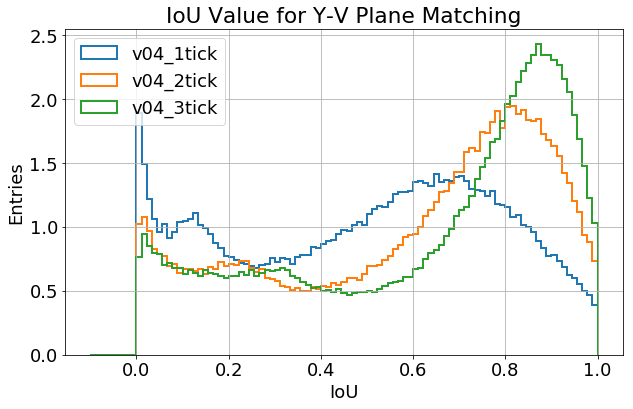

In [77]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-0.1,1,100)
plt.hist(df_Matching_1tick_v04['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04_1tick',density='True')
plt.hist(df_Matching_2tick_v04['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04_2tick',density='True')
plt.hist(df_Matching_3tick_v04['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04_3tick',density='True')

plt.title("IoU Value for Y-V Plane Matching")
plt.xlabel('IoU')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()

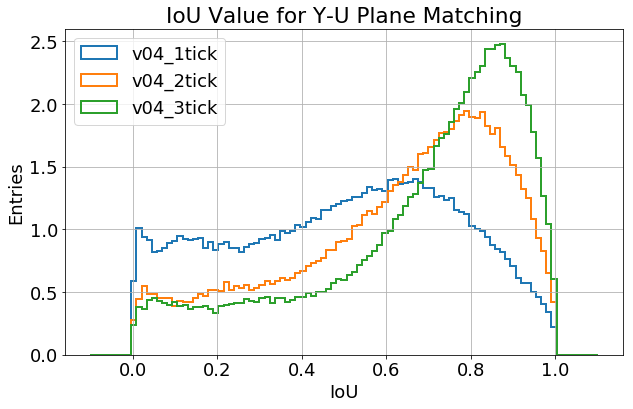

In [78]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-0.1,1.1,100)
plt.hist(df_Matching_1tick_v04['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04_1tick',density='True')
plt.hist(df_Matching_2tick_v04['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04_2tick',density='True')
plt.hist(df_Matching_3tick_v04['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04_3tick',density='True')
plt.title("IoU Value for Y-U Plane Matching")
plt.xlabel('IoU')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()

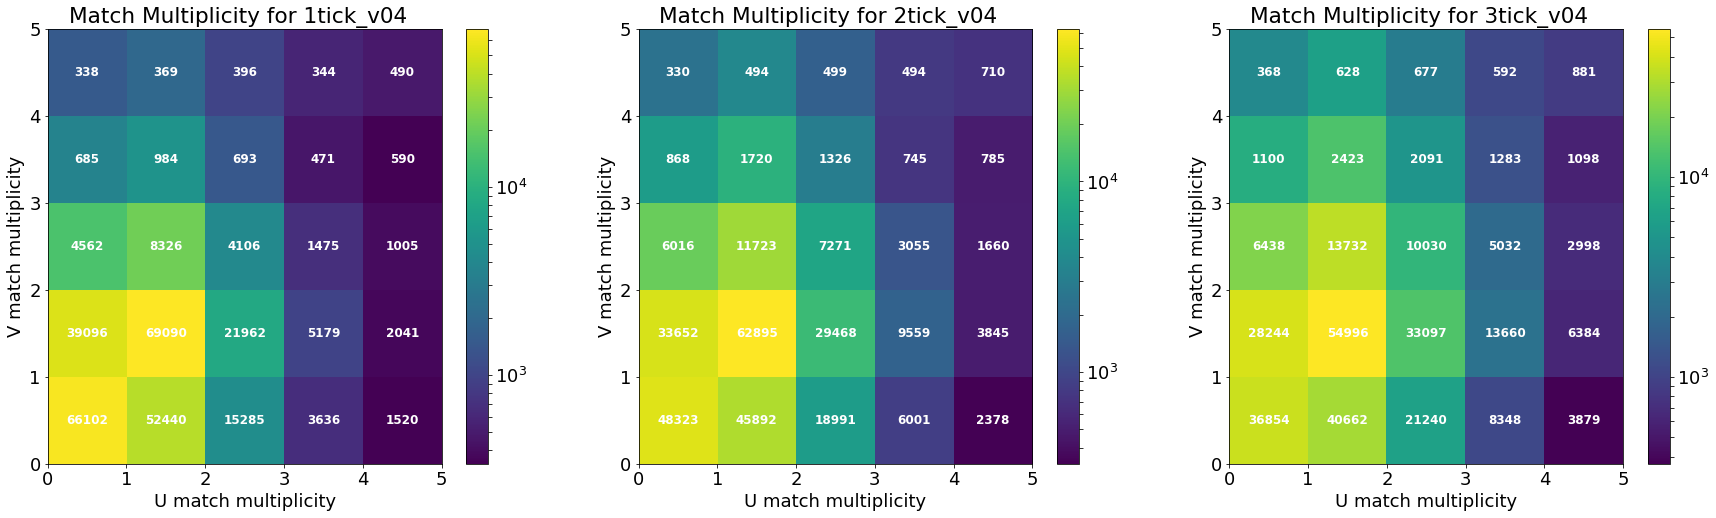

In [79]:
fig = plt.figure(figsize=(30,8))
plt.subplot(1, 3, 1)
hist, xbins, ybins, im = plt.hist2d(df_Matching_1tick_v04['U_match_multiplicity'].values,df_Matching_1tick_v04['V_match_multiplicity'].values, bins=(5), range=[[-0.0000001, 5], [-0.00000010, 5]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold",fontsize= 12)

plt.colorbar()
plt.title('Match Multiplicity for 1tick_v04  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')
plt.subplot(1, 3, 2)
hist, xbins, ybins, im = plt.hist2d(df_Matching_2tick_v04['U_match_multiplicity'].values,df_Matching_2tick_v04['V_match_multiplicity'].values, bins=(5), range=[[-0.0000001, 5], [-0.00000010, 5]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold",fontsize= 12)

plt.colorbar()
plt.title('Match Multiplicity for 2tick_v04  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')
plt.subplot(1, 3, 3)
hist, xbins, ybins, im = plt.hist2d(df_Matching_3tick_v04['U_match_multiplicity'].values,df_Matching_3tick_v04['V_match_multiplicity'].values, bins=(5), range=[[-0.0000001, 5], [-0.00000010, 5]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold",fontsize= 12)

plt.colorbar()
plt.title('Match Multiplicity for 3tick_v04  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')




plt.show()
fig.savefig('multi_tick_v04.png', dpi=200)

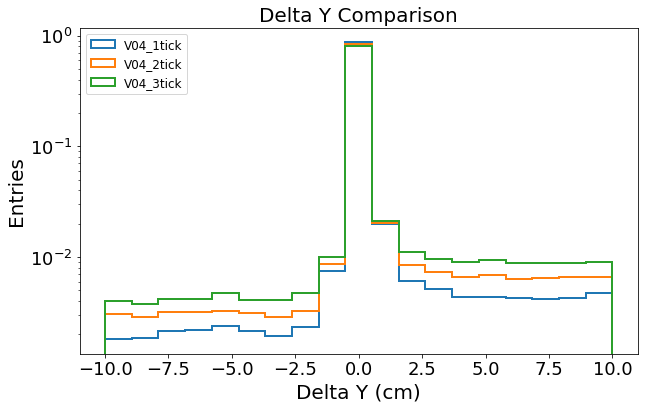

In [80]:
fig = plt.figure(figsize=(10,6))

BINS=np.linspace(-10,10,20)
plt.hist(df_Matching_1tick_v04['deltaY'].values, bins=BINS,histtype='step',lw=2,label='V04_1tick',density='True')
plt.hist(df_Matching_2tick_v04['deltaY'].values, bins=BINS,histtype='step',lw=2,label='V04_2tick',density='True')
plt.hist(df_Matching_3tick_v04['deltaY'].values, bins=BINS,histtype='step',lw=2,label='V04_3tick',density='True')
plt.yscale('log')
plt.legend(loc=2,prop={'size': 12})
plt.xlabel("Delta Y (cm)",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Delta Y Comparison',fontsize=20)

plt.show()
fig.savefig('deltaY_Comparison_ticks.png', dpi=500)

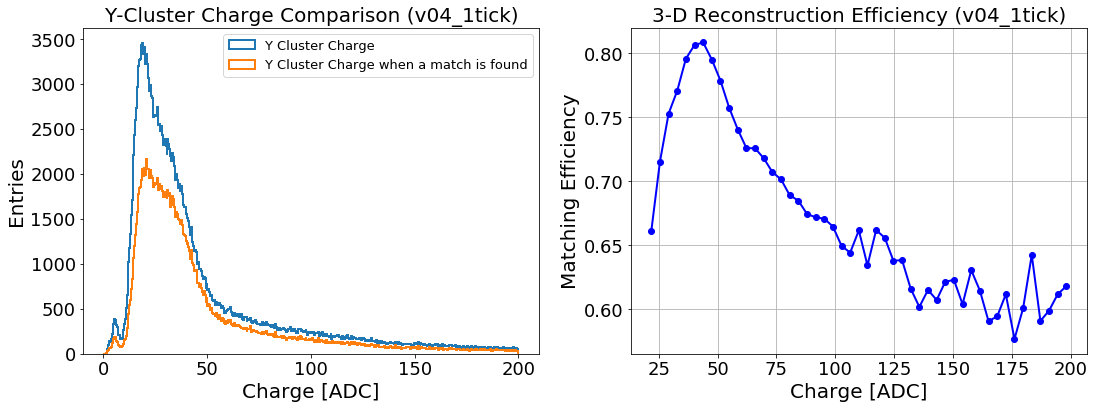

In [81]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_1tick_v04['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_1tick_v04_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v04_1tick)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v04_1tick, bins2D_v04_1tick = np.histogram(df_Matching_1tick_v04['Y_cluster_charge'].values,bins=BINS)
vals3D_v04_1tick, bins3D_v04_1tick = np.histogram(df_Matching_1tick_v04_match['Y_cluster_charge'].values,bins=BINS)
binC_v04_1tick = 0.5*(bins2D_v04_1tick[1:]+bins2D_v04_1tick[:-1])
vals2D_v04_1tick = vals2D_v04_1tick.astype(float)
#print vals2D
vals3D_v04_1tick = vals3D_v04_1tick.astype(float)
ratio_v_v04_1tick = []
for i,v in enumerate(vals2D_v04_1tick):
    if (v == 0):
        ratio_v_v04_1tick.append(0.)
    else:
        ratio_v_v04_1tick.append(vals3D_v04_1tick[i]/v)
#print ratio_v
plt.plot(binC_v04_1tick,ratio_v_v04_1tick,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04_1tick)',fontsize=20)

plt.show()


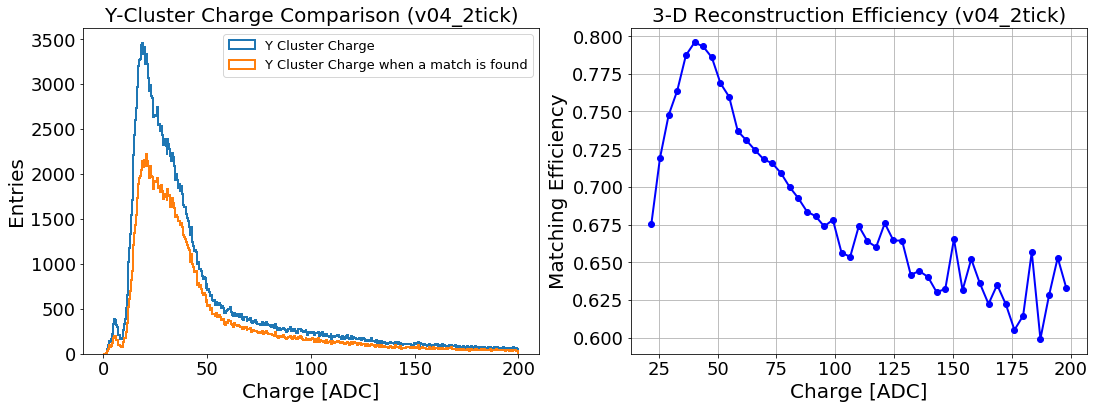

In [82]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_2tick_v04['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_2tick_v04_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v04_2tick)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v04_2tick, bins2D_v04_2tick = np.histogram(df_Matching_2tick_v04['Y_cluster_charge'].values,bins=BINS)
vals3D_v04_2tick, bins3D_v04_2tick = np.histogram(df_Matching_2tick_v04_match['Y_cluster_charge'].values,bins=BINS)
binC_v04_2tick = 0.5*(bins2D_v04_2tick[1:]+bins2D_v04_2tick[:-1])
vals2D_v04_2tick = vals2D_v04_2tick.astype(float)
#print vals2D
vals3D_v04_2tick = vals3D_v04_2tick.astype(float)
ratio_v_v04_2tick = []
for i,v in enumerate(vals2D_v04_2tick):
    if (v == 0):
        ratio_v_v04_2tick.append(0.)
    else:
        ratio_v_v04_2tick.append(vals3D_v04_2tick[i]/v)
#print ratio_v
plt.plot(binC_v04_2tick,ratio_v_v04_2tick,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04_2tick)',fontsize=20)

plt.show()


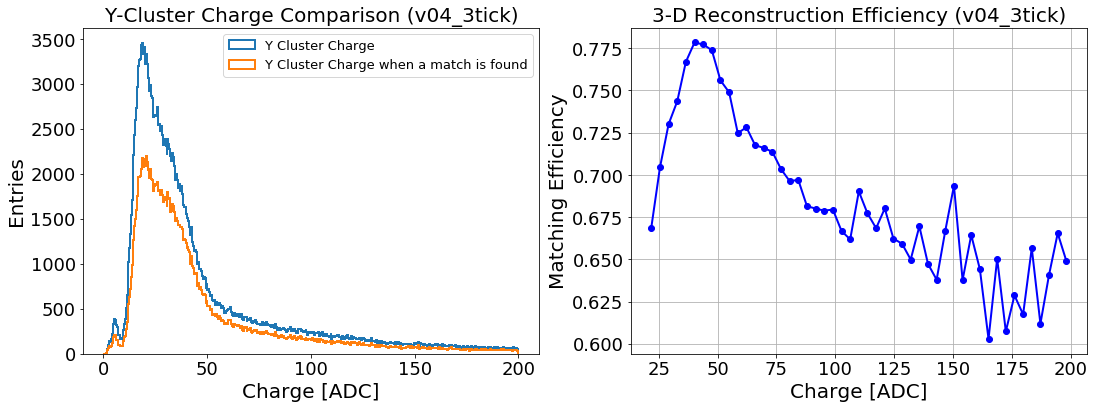

In [83]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_3tick_v04['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_3tick_v04_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v04_3tick)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v04_3tick, bins2D_v04_3tick = np.histogram(df_Matching_3tick_v04['Y_cluster_charge'].values,bins=BINS)
vals3D_v04_3tick, bins3D_v04_3tick = np.histogram(df_Matching_3tick_v04_match['Y_cluster_charge'].values,bins=BINS)
binC_v04_3tick = 0.5*(bins2D_v04_3tick[1:]+bins2D_v04_3tick[:-1])
vals2D_v04_3tick = vals2D_v04_3tick.astype(float)
#print vals2D
vals3D_v04_3tick = vals3D_v04_3tick.astype(float)
ratio_v_v04_3tick = []
for i,v in enumerate(vals2D_v04_3tick):
    if (v == 0):
        ratio_v_v04_3tick.append(0.)
    else:
        ratio_v_v04_3tick.append(vals3D_v04_3tick[i]/v)
#print ratio_v
plt.plot(binC_v04_3tick,ratio_v_v04_3tick,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04_3tick)',fontsize=20)

plt.show()


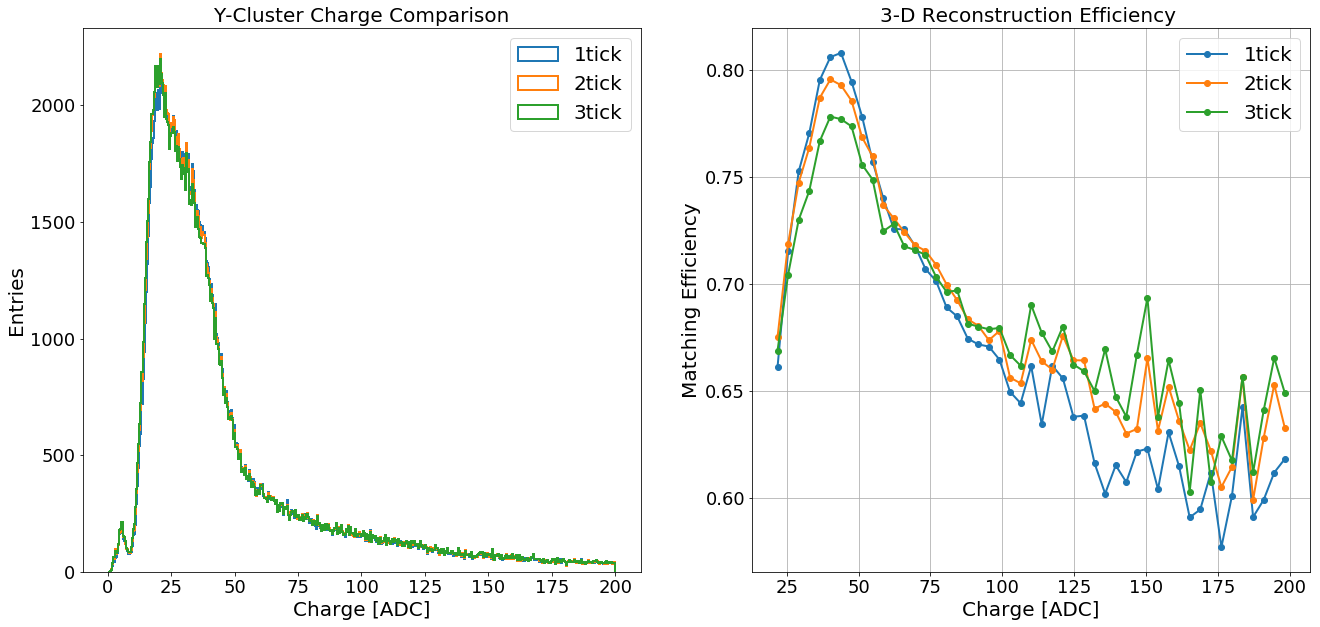

In [84]:
fig = plt.figure(figsize=(22,10))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_1tick_v04_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='1tick')
plt.hist(df_Matching_2tick_v04_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='2tick')
plt.hist(df_Matching_3tick_v04_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='3tick')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)#
plt.title('Y-Cluster Charge Comparison',fontsize=20)
plt.legend(loc=1,fontsize=20)
plt.subplot(1, 2, 2)
BINS = np.linspace(20,200,50)
plt.plot(binC_v04_1tick,ratio_v_v04_1tick,'o-',lw=2,label='1tick')
plt.plot(binC_v04_2tick,ratio_v_v04_2tick,'o-',lw=2,label='2tick')
plt.plot(binC_v04_3tick,ratio_v_v04_3tick,'o-',lw=2,label='3tick')
plt.grid()
plt.legend(loc=1,fontsize=20)
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency ',fontsize=20)

plt.show()


In [85]:
# Argon properties

#LAr temperature
T = 89
# density
rho = 1.38 # g/cm^3

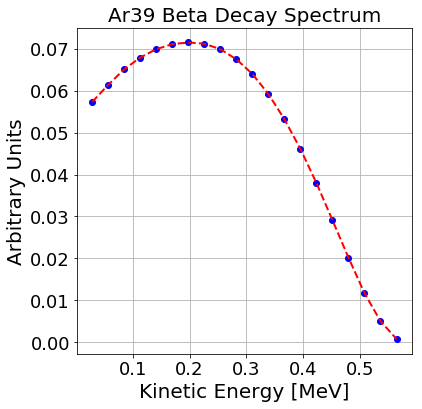

In [86]:
# Ar 39 energy spectrum

Ar39_E_v = [0.0282,0.0565,0.0847,0.1130,0.1412,0.1695,0.1977,0.2260,\
            0.2542,0.2825,0.3107,0.3390,0.3672,0.3955,0.4237,0.4520,0.4802,0.5085,0.5367,0.5650]

Ar39_A_v = [5.73E-02,6.14E-02,6.51E-02,6.79E-02,6.99E-02,7.11E-02,7.15E-02,\
            7.12E-02,6.99E-02,6.75E-02,6.40E-02,5.92E-02,5.32E-02,4.61E-02,\
            3.80E-02,2.91E-02,2.02E-02,1.17E-02,5.02E-03,7.77E-04]

# spline
Ar39spectrum = interp1d(Ar39_E_v,Ar39_A_v)

fig = plt.figure(figsize=(6,6))
plt.plot(Ar39_E_v,Ar39_A_v,'bo',lw=2)
xvals = np.linspace(Ar39_E_v[0],Ar39_E_v[-1],100)
plt.plot(xvals,Ar39spectrum(xvals),'r--',lw=2)
plt.xlabel("Kinetic Energy [MeV]",fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Beta Decay Spectrum',fontsize=20)
plt.grid()
plt.show()

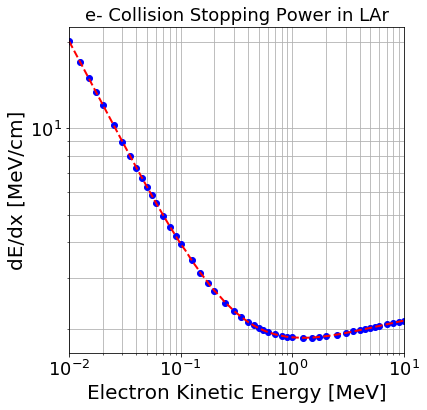

In [87]:
# load electron energy loss info [NIST]
fin = open('/uboone/app/users/abhat/gammacatcher_v08_00_00_09/srcs/ubreco/ubreco/GammaCatcher/nist_esar_ar_1p38density_188eV.txt','r')
ctr = 0

energy_v = []
collision_v = []

for line in fin:
    ctr += 1
    
    if (ctr < 9):
        continue
    words = line.split()
    if (len(words) != 4):
        continue
    energy_v.append   ( float(words[0])       )
    collision_v.append( float(words[1]) * rho )
    
energy_v    = np.array(energy_v   )
collision_v = np.array(collision_v)

dEdx = interp1d(energy_v,collision_v)

fig = plt.figure(figsize=(6,6))
plt.plot(energy_v,collision_v,'bo',lw=2)
xvals = np.linspace(0.01,10,1000)
plt.plot(xvals,dEdx(xvals),'r--',lw=2)
plt.xlim([0.01,10])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('dE/dx [MeV/cm]',fontsize=20)
plt.title('e- Collision Stopping Power in LAr',fontsize=18)
plt.show()

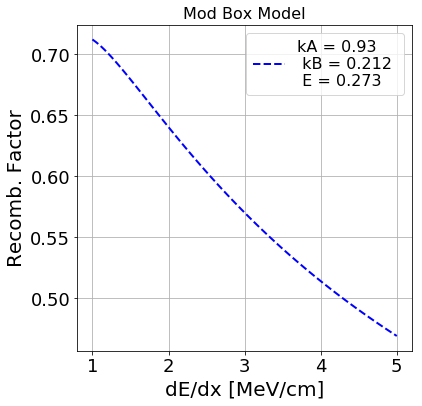

In [88]:
# Ion recombination model

# recombination model
def RecombModBox(dEdx, A, B, Efield):
    B /= (rho * Efield)
    r = np.log( dEdx * B + A ) / ( dEdx * B )
    return 1-r

def RecombBirks(dEdx, A, k, Efield):
    k /= rho
    r = ( 1 + k * dEdx / Efield ) / A
    return 1/r


fRecombA  = 0.8 # +- 0.003
fRecombk  = 0.0486 # +- 0.0006

fModBoxA = 0.93
fModBoxB = 0.212#0.212#3

fEfield  = 0.273

fig = plt.figure(figsize=(6,6))
dedx_v = np.linspace(1,5,100)
R_v = []
for dedx in dedx_v:
    R_v.append(1-RecombModBox(dedx,fModBoxA,fModBoxB,fEfield))
plt.plot(dedx_v,R_v,'b--',lw=2,label='kA = 0.93 \n kB = 0.212 \n E = 0.273')
plt.grid()
plt.xlabel('dE/dx [MeV/cm]',fontsize=20)
plt.ylabel('Recomb. Factor',fontsize=20)
plt.title('Mod Box Model',fontsize=16)
plt.legend(loc=1,fontsize=16)
plt.show()

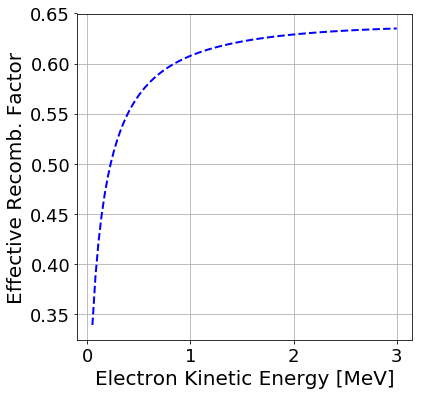

In [89]:
# Apply recombination model to get effective recombination for each electron energy
# return effective charge quenching amount
# effective recombination = amount of recombination for total energy lost by electron of given KE.

def EffectiveRecomb(ElectronEnergy,Estep,Field):
    
    # keep track of total energy lost
    dEtot = 0.
    # and total energy "seen" after recomb.
    dEobs = 0.
    
    while (ElectronEnergy > 1e-2):
    
        dedx = dEdx(ElectronEnergy)
        R    = RecombModBox(dedx,fModBoxA,fModBoxB,Field)
        
        dEtot += Estep
        dEobs += Estep * (1-R)
        
        ElectronEnergy -= Estep
        
        #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
        
    # perform last step
    dedx = dEdx(1e-2)
    dEtot += ElectronEnergy
    dEobs += ElectronEnergy * (1 - RecombModBox(dedx,fModBoxA,fModBoxB,Field))
    #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
    
    return dEobs/dEtot

def Charge(ElectronEnergy,efield):
    
    EffRecomb = EffectiveRecomb(ElectronEnergy,0.01,efield)
    Eobs = ElectronEnergy * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    return Qobs

EffectiveRecomb_v = np.vectorize(EffectiveRecomb)
Charge_v = np.vectorize(Charge)

EffectiveRecomb(0.25,0.01,0.273)

fig = plt.figure(figsize=(6,6))
Evals = np.linspace(0.05,3,100)
Rvals = []
for E in Evals:
    Rvals.append(EffectiveRecomb(E,0.01,0.273))
plt.plot(Evals,Rvals,'b--',lw=2)
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('Effective Recomb. Factor',fontsize=20)
plt.grid()
plt.show()



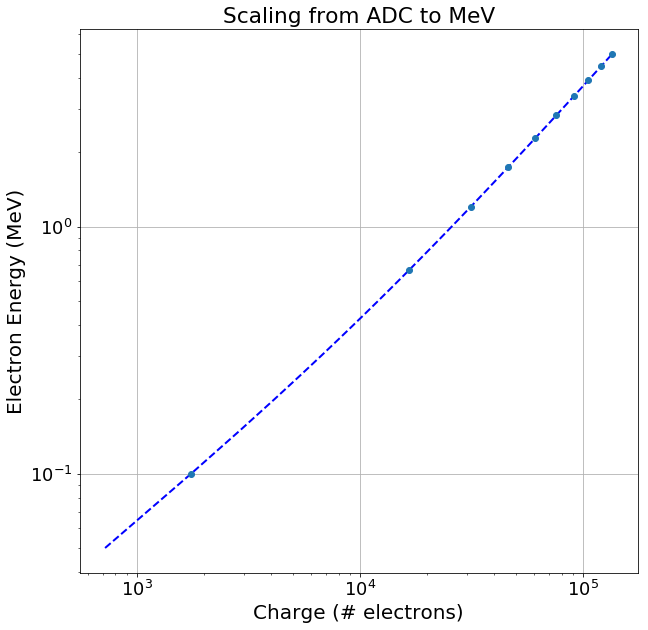

In [90]:
fig = plt.figure(figsize=(10,10))
Evals = np.linspace(0.05,5,100)
Qvals = []
for E in Evals:
    #R = EffectiveRecomb(E,0.01,0.273)
    Q = Charge(E,0.273)
    Qvals.append(Q)
    
fQ2E = interp1d(Qvals, Evals,kind='cubic')
xnew = np.linspace(Qvals[1], Qvals[-1], num=10, endpoint=True)
plt.plot(Qvals,Evals,'b--',xnew, fQ2E(xnew),'o',lw=2)
plt.ylabel('Electron Energy (MeV)',fontsize=20)
plt.xlabel('Charge (# electrons)',fontsize=20)
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.title('Scaling from ADC to MeV')
plt.show()
fig.savefig('Q2E.png', dpi=300)

In [91]:
# calculate Ar39 spectrum [in drifted electrons] accounting for recombination

# sample randomly from Ar39 spectrum and calculate visible charge for each event
Ar39_Q_v = []

Eavg = 0.

for n in xrange(5000):
    
    found = False
    while (found == False):
        Eval = np.random.uniform(Ar39_E_v[0],Ar39_E_v[-1])
        if (Ar39spectrum(Eval) > np.random.uniform(0,0.08) ): # 0.08 due to values in 1st histogram in notebook
            found = True
    Eavg += Eval
    EffRecomb = EffectiveRecomb(Eval,0.01,0.273)
    Eobs = Eval * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    Ar39_Q_v.append(Qobs)
Eavg /= 5000
print Eavg

0.241239629516


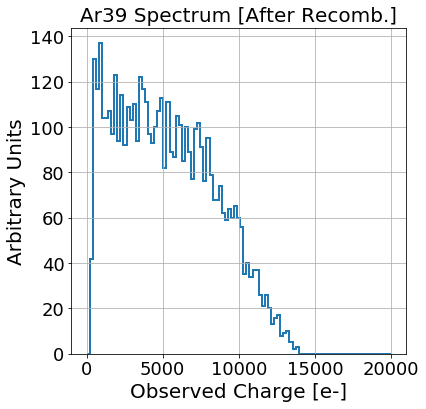

In [92]:
fig = plt.figure(figsize=(6,6))
plt.hist(Ar39_Q_v,bins=np.linspace(0,2e4,100),histtype='step',lw=2)
plt.grid()
plt.xlabel('Observed Charge [e-]',fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Spectrum [After Recomb.]',fontsize=20)
plt.show()

In [93]:
elec_KE = np.linspace(0.05,1,100)
elec_Q_273 = []
elec_Q_500 = []
for ke in elec_KE:
    elec_Q_273.append(Charge(ke,0.273)/1e3)
    elec_Q_500.append(Charge(ke,0.500)/1e3)

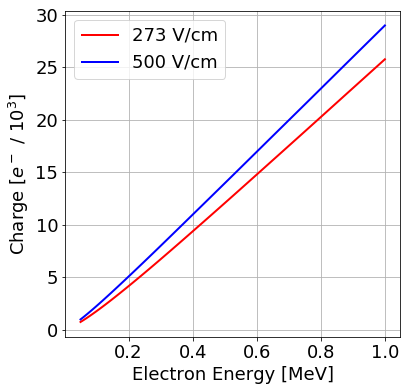

In [94]:
fig = plt.figure(figsize=(6,6))
plt.plot(elec_KE,elec_Q_273,lw=2,color='r',label='273 V/cm')
plt.plot(elec_KE,elec_Q_500,lw=2,color='b',label='500 V/cm')
plt.grid()
plt.xlabel('Electron Energy [MeV]')
plt.ylabel('Charge [$e^-$ / $10^3$]')
plt.legend(loc=2,fontsize=18)
plt.show()

In [95]:
def E_recoY_v04_1tick(df,gain):
    YQ_v04_1tick = df['Y_cluster_charge']
    QrecoY_v04_1tick = YQ_v04_1tick * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v04_1tick = fQ2E(QrecoY_v04_1tick)
    return ErecoY_v04_1tick

def E_recoU_v04_1tick(df,gain):
    UQ_v04_1tick = df['U_cluster_charge']
    QrecoU_v04_1tick = UQ_v04_1tick * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_v04_1tick = fQ2E(QrecoU_v04_1tick)
    return ErecoU_v04_1tick

def E_recoV_v04_1tick(df,gain):
    VQ_v04_1tick = df['V_cluster_charge']
    QrecoV_v04_1tick = VQ_v04_1tick * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_v04_1tick = fQ2E(QrecoV_v04_1tick)
    return ErecoV_v04_1tick

def E_recoY_v04_2tick(df,gain):
    YQ_v04_2tick = df['Y_cluster_charge']
    QrecoY_v04_2tick = YQ_v04_2tick * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v04_2tick = fQ2E(QrecoY_v04_2tick)
    return ErecoY_v04_2tick

def E_recoU_v04_2tick(df,gain):
    UQ_v04_2tick = df['U_cluster_charge']
    QrecoU_v04_2tick = UQ_v04_2tick * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_v04_2tick = fQ2E(QrecoU_v04_2tick)
    return ErecoU_v04_2tick

def E_recoV_v04_2tick(df,gain):
    VQ_v04_2tick = df['V_cluster_charge']
    QrecoV_v04_2tick = VQ_v04_2tick * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_v04_2tick = fQ2E(QrecoV_v04_2tick)
    return ErecoV_v04_2tick





def E_recoY_v04_3tick(df,gain):
    YQ_v04_3tick = df['Y_cluster_charge']
    QrecoY_v04_3tick = YQ_v04_3tick * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v04_3tick = fQ2E(QrecoY_v04_3tick)
    return ErecoY_v04_3tick

def E_recoU_v04_3tick(df,gain):
    UQ_v04_3tick = df['U_cluster_charge']
    QrecoU_v04_3tick = UQ_v04_3tick * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_v04_3tick = fQ2E(QrecoU_v04_3tick)
    return ErecoU_v04_3tick

def E_recoV_v04_3tick(df,gain):
    VQ_v04_3tick = df['V_cluster_charge']
    QrecoV_v04_3tick = VQ_v04_3tick * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_v04_3tick = fQ2E(QrecoV_v04_3tick)
    return ErecoV_v04_3tick

In [96]:
dfcut_match_v04_1tick = df_Matching_1tick_v04_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v04_1tick   = df_Matching_1tick_v04.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v04_1tick['energy'] = E_recoY_v04_1tick(dfcut_match_v04_1tick,238.4)
dfcut_all_v04_1tick['energy']   = E_recoY_v04_1tick(dfcut_all_v04_1tick,238.4)

dfcut_match_v04_2tick = df_Matching_2tick_v04_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v04_2tick   = df_Matching_2tick_v04.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v04_2tick['energy'] = E_recoY_v04_2tick(dfcut_match_v04_2tick,238.4)
dfcut_all_v04_2tick['energy']   = E_recoY_v04_2tick(dfcut_all_v04_2tick,238.4)



dfcut_match_v04_3tick = df_Matching_3tick_v04_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v04_3tick   = df_Matching_3tick_v04.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v04_3tick['energy'] = E_recoY_v04_3tick(dfcut_match_v04_3tick,238.4)
dfcut_all_v04_3tick['energy']   = E_recoY_v04_3tick(dfcut_all_v04_3tick,238.4)

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

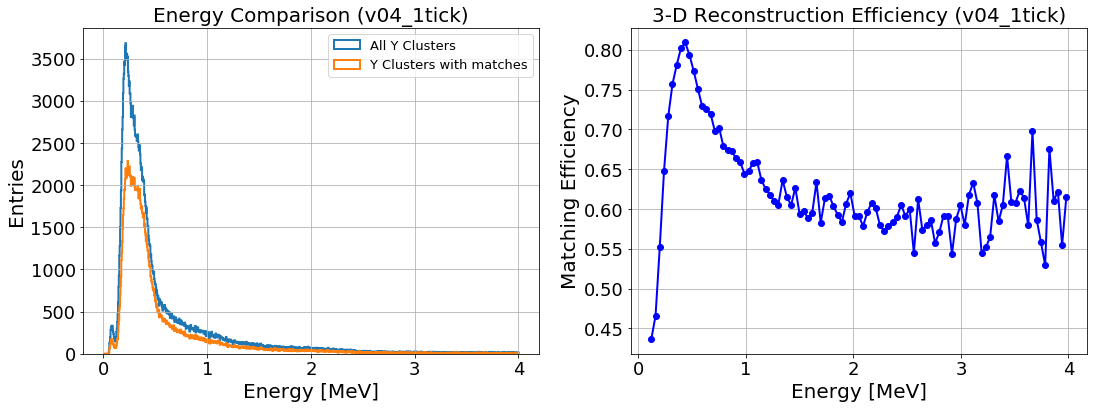

In [97]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,4,1000)
plt.hist(dfcut_all_v04_1tick['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v04_1tick['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v04_1tick)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,4,100)

vals2D_v04_1tick, bins2D_v04_1tick = np.histogram(dfcut_all_v04_1tick['energy'].values,bins=BINS)
vals3D_v04_1tick, bins3D_v04_1tick = np.histogram(dfcut_match_v04_1tick['energy'].values,bins=BINS)
binC_v04_1tick = 0.5*(bins2D_v04_1tick[1:]+bins2D_v04_1tick[:-1])
vals2D_v04_1tick = vals2D_v04_1tick.astype(float)
#print vals2D
vals3D_v04_1tick = vals3D_v04_1tick.astype(float)
ratio_v_v04_1tick = []
for i,v in enumerate(vals2D_v04_1tick):
    if (v == 0):
        ratio_v_v04_1tick.append(0.)
    else:
        ratio_v_v04_1tick.append(vals3D_v04_1tick[i]/v)
#print ratio_v
plt.plot(binC_v04_1tick,ratio_v_v04_1tick,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04_1tick)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)

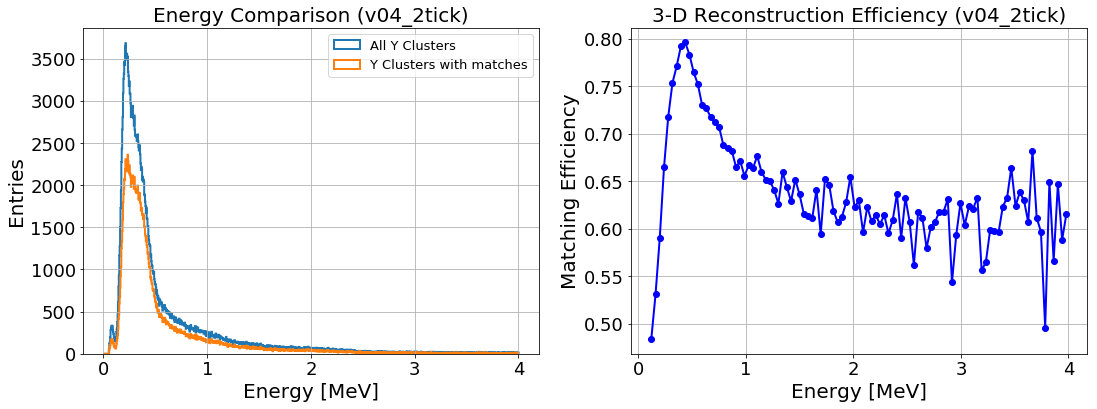

In [98]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,4,1000)
plt.hist(dfcut_all_v04_2tick['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v04_2tick['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v04_2tick)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,4,100)

vals2D_v04_2tick, bins2D_v04_2tick = np.histogram(dfcut_all_v04_2tick['energy'].values,bins=BINS)
vals3D_v04_2tick, bins3D_v04_2tick = np.histogram(dfcut_match_v04_2tick['energy'].values,bins=BINS)
binC_v04_2tick = 0.5*(bins2D_v04_2tick[1:]+bins2D_v04_1tick[:-1])
vals2D_v04_2tick = vals2D_v04_2tick.astype(float)
#print vals2D
vals3D_v04_2tick = vals3D_v04_2tick.astype(float)
ratio_v_v04_2tick = []
for i,v in enumerate(vals2D_v04_2tick):
    if (v == 0):
        ratio_v_v04_2tick.append(0.)
    else:
        ratio_v_v04_2tick.append(vals3D_v04_2tick[i]/v)
#print ratio_v
plt.plot(binC_v04_2tick,ratio_v_v04_2tick,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04_2tick)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)

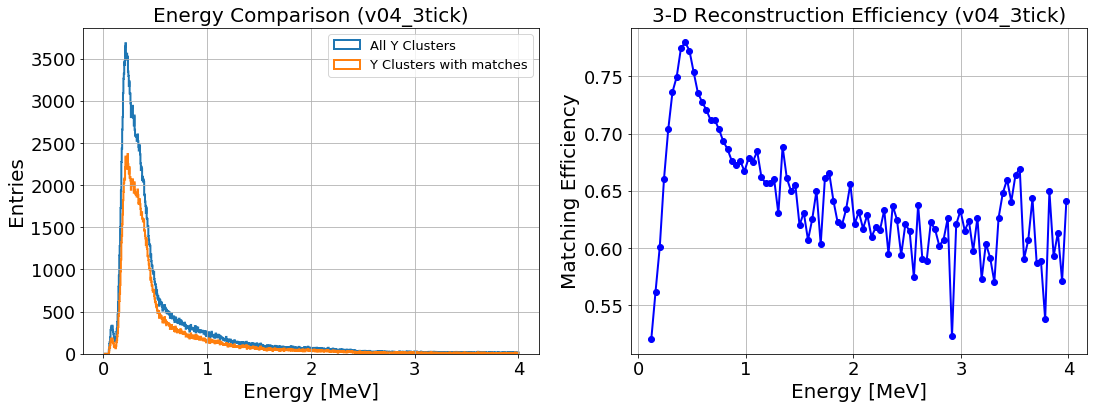

In [99]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,4,1000)
plt.hist(dfcut_all_v04_3tick['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v04_3tick['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v04_3tick)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,4,100)

vals2D_v04_3tick, bins2D_v04_3tick = np.histogram(dfcut_all_v04_3tick['energy'].values,bins=BINS)
vals3D_v04_3tick, bins3D_v04_3tick = np.histogram(dfcut_match_v04_3tick['energy'].values,bins=BINS)
binC_v04_3tick = 0.5*(bins2D_v04_3tick[1:]+bins2D_v04_3tick[:-1])
vals2D_v04_3tick = vals2D_v04_3tick.astype(float)
#print vals2D
vals3D_v04_3tick = vals3D_v04_3tick.astype(float)
ratio_v_v04_3tick = []
for i,v in enumerate(vals2D_v04_3tick):
    if (v == 0):
        ratio_v_v04_3tick.append(0.)
    else:
        ratio_v_v04_3tick.append(vals3D_v04_3tick[i]/v)
#print ratio_v
plt.plot(binC_v04_3tick,ratio_v_v04_3tick,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04_3tick)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)

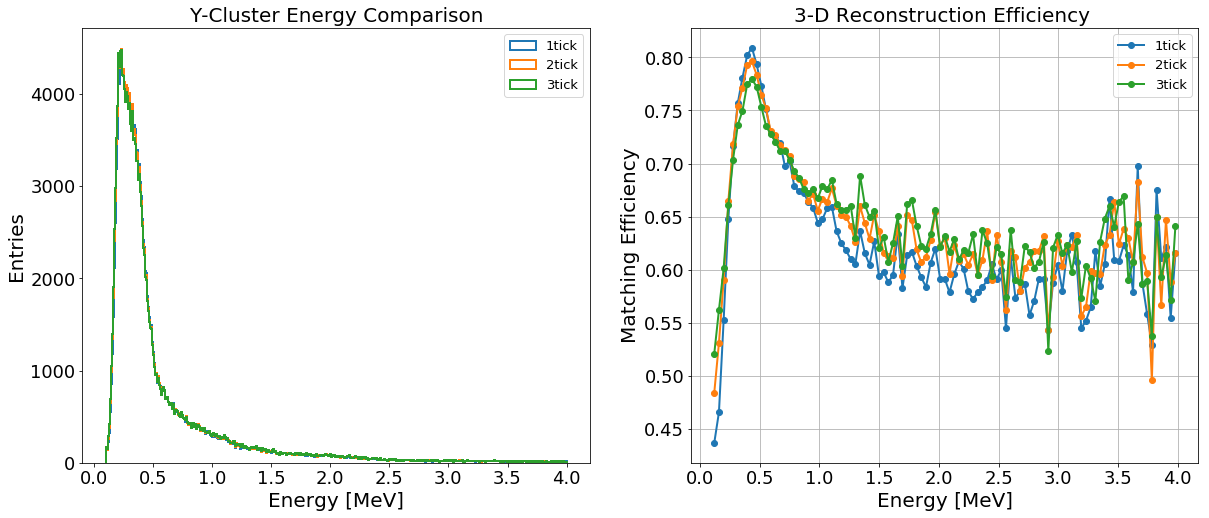

In [100]:
fig = plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,4,500)
plt.hist(dfcut_match_v04_1tick['energy'].values, bins=BINS,histtype='step',lw=2,label='1tick')
plt.hist(dfcut_match_v04_2tick['energy'].values, bins=BINS,histtype='step',lw=2,label='2tick')
plt.hist(dfcut_match_v04_3tick['energy'].values, bins=BINS,histtype='step',lw=2,label='3tick')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)#
plt.title('Y-Cluster Energy Comparison',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
BINS = np.linspace(20,200,50)
plt.plot(binC_v04_1tick,ratio_v_v04_1tick,'o-',lw=2,label='1tick')
plt.plot(binC_v04_2tick,ratio_v_v04_2tick,'o-',lw=2,label='2tick')
plt.plot(binC_v04_3tick,ratio_v_v04_3tick,'o-',lw=2,label='3tick')
plt.grid()
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency ',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.show()


In [101]:
deltaYcut='U_match_multiplicity==1 and V_match_multiplicity==1'
df_delta_1tick=dfcut_match_v04_1tick.query(deltaYcut)
df_delta_2tick=dfcut_match_v04_2tick.query(deltaYcut)
df_delta_3tick=dfcut_match_v04_3tick.query(deltaYcut)

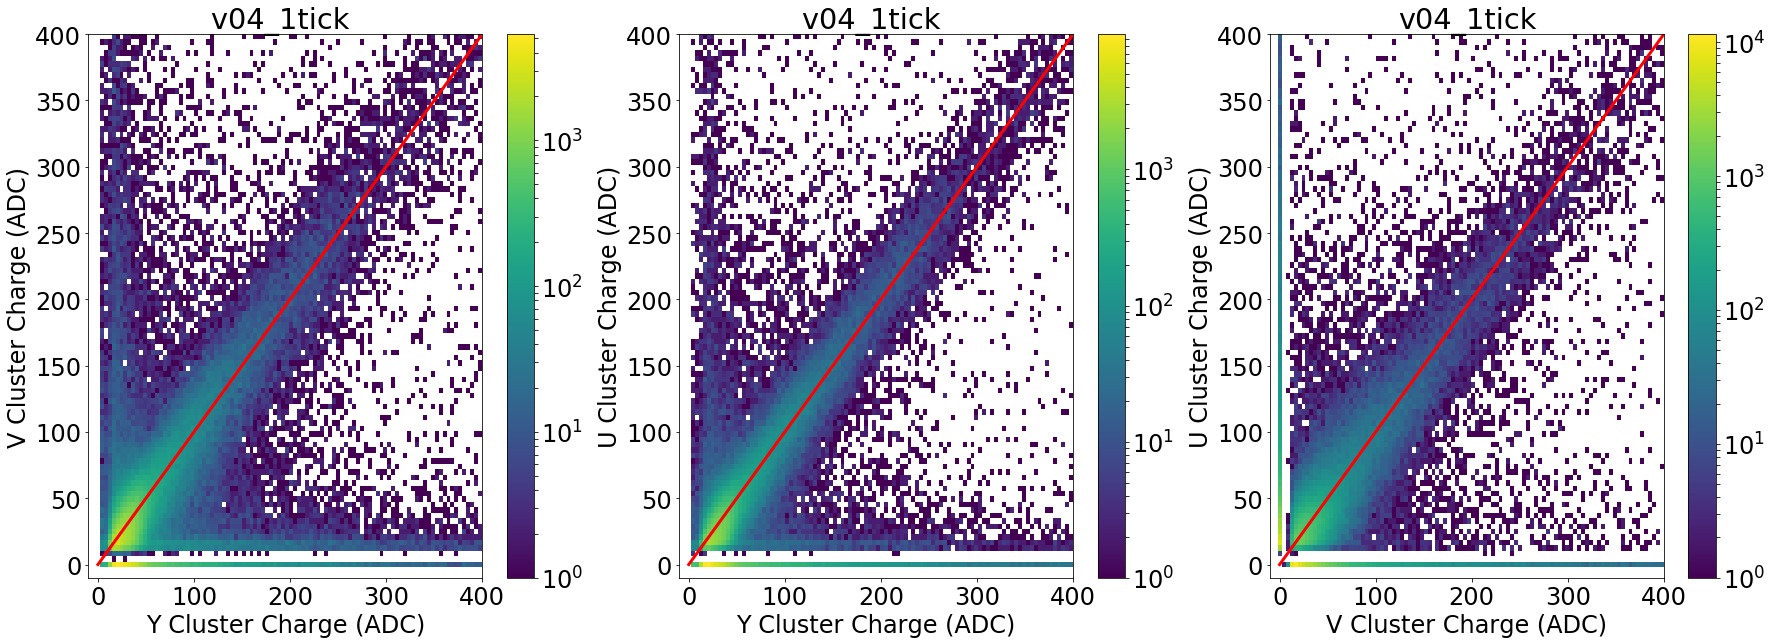

In [102]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfcut_match_v04_1tick['Y_cluster_charge'].values,dfcut_match_v04_1tick['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')

#plt.hist2d(df_delta_1tick['Y_cluster_charge'].values,df_delta_1tick['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v04_1tick ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfcut_match_v04_1tick['Y_cluster_charge'].values,dfcut_match_v04_1tick['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')

#plt.hist2d(df_delta_1tick['Y_cluster_charge'].values,df_delta_1tick['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v04_1tick ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfcut_match_v04_1tick['V_cluster_charge'].values,dfcut_match_v04_1tick['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
#plt.hist2d(df_delta_1tick['V_cluster_charge'].values,df_delta_1tick['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('v04_1tick')
#plt.legend(loc=1)
plt.show()

#plt.draw()
#fig.savefig('charge11.png', dpi=270)



/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

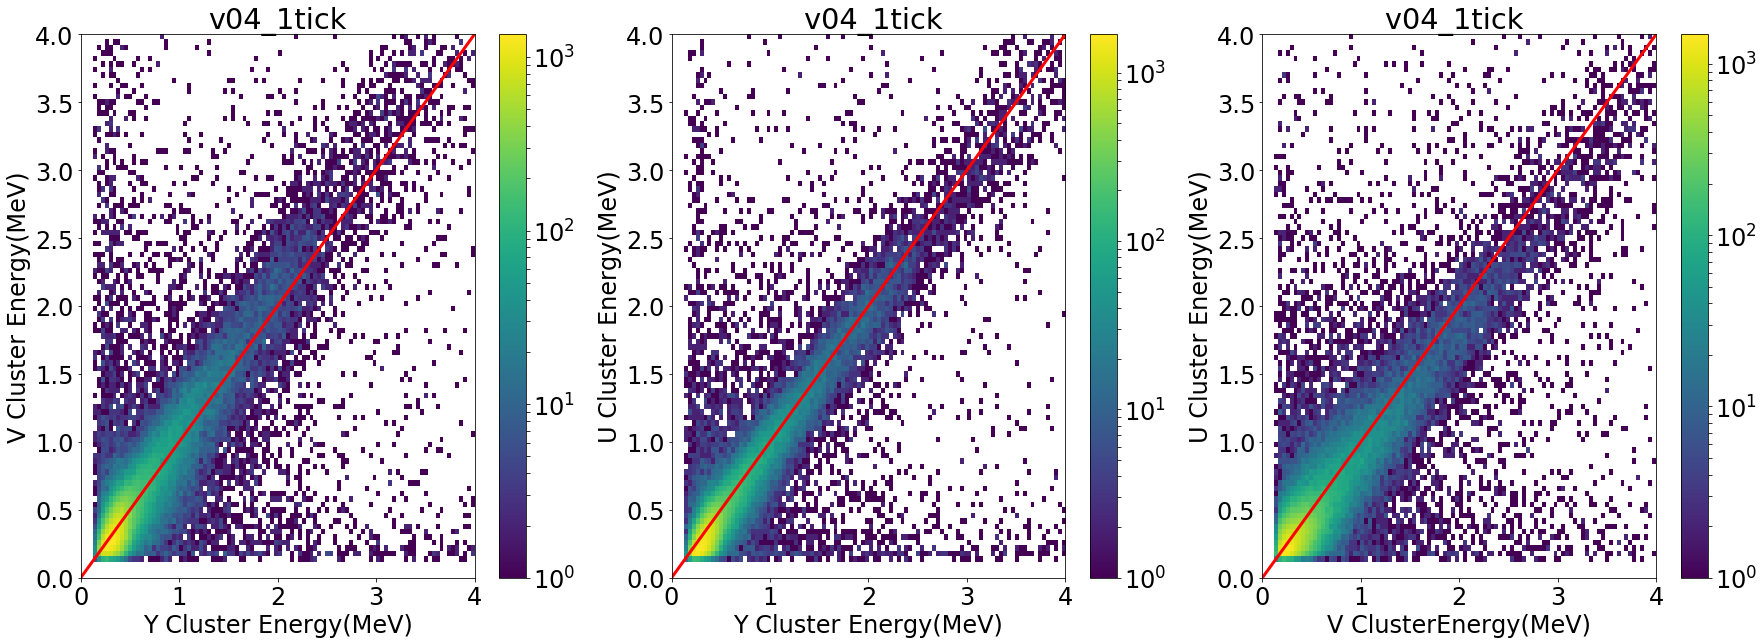

In [103]:
CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge >10.'
CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge>10. '
CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >10. '

#dfChargeCut_v04_1tick = df_delta_1tick.query(CUT)
dfChargeCut_v04_1tick = dfcut_match_v04_1tick.query(CUT)
dfChargeCut_v04_1tick['energyY_v04_1tick'] = E_recoY_v04_1tick(dfChargeCut_v04_1tick,238.4)
dfChargeCut_v04_1tick['energyU_v04_1tick'] = E_recoU_v04_1tick(dfChargeCut_v04_1tick,232)
dfChargeCut_v04_1tick['energyV_v04_1tick'] = E_recoV_v04_1tick(dfChargeCut_v04_1tick,249)


EMAX = 4.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut_v04_1tick['energyY_v04_1tick'].values,dfChargeCut_v04_1tick['energyV_v04_1tick'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v04_1tick')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut_v04_1tick['energyY_v04_1tick'].values,dfChargeCut_v04_1tick['energyU_v04_1tick'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title(' v04_1tick')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut_v04_1tick['energyV_v04_1tick'].values,dfChargeCut_v04_1tick['energyU_v04_1tick'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('v04_1tick ')
#plt.legend(loc=1)

plt.show
plt.draw()
#fig.savefig('Energy1-1.png', dpi=27v00

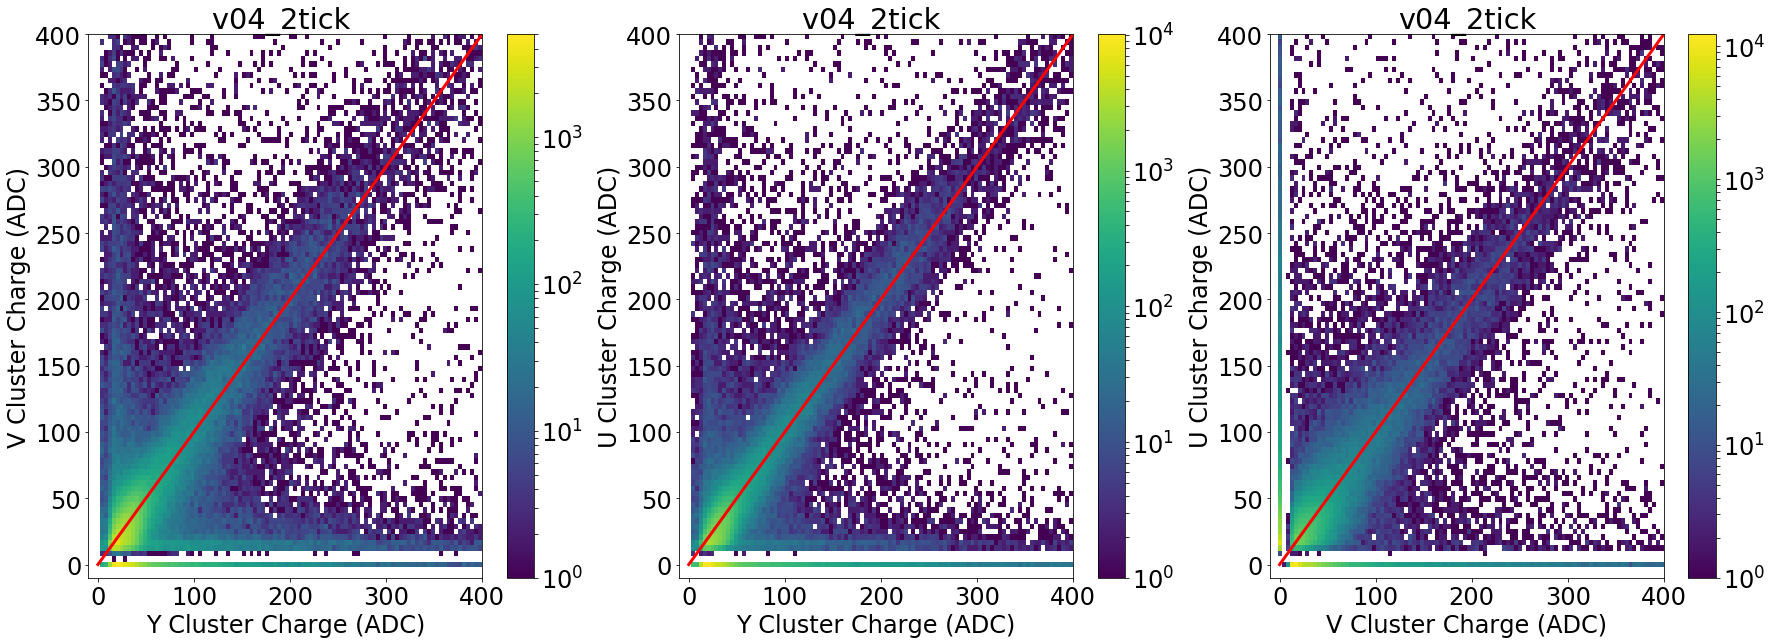

In [104]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfcut_match_v04_2tick['Y_cluster_charge'].values,dfcut_match_v04_2tick['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')

#plt.hist2d(df_delta_2tick['Y_cluster_charge'].values,df_delta_2tick['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v04_2tick ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfcut_match_v04_2tick['Y_cluster_charge'].values,dfcut_match_v04_2tick['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')

#plt.hist2d(df_delta_2tick['Y_cluster_charge'].values,df_delta_2tick['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v04_2tick ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfcut_match_v04_2tick['V_cluster_charge'].values,dfcut_match_v04_2tick['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
#plt.hist2d(df_delta_2tick['V_cluster_charge'].values,df_delta_2tick['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('v04_2tick')
#plt.legend(loc=1)
plt.show()

#plt.draw()
#fig.savefig('charge11.png', dpi=270)



/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

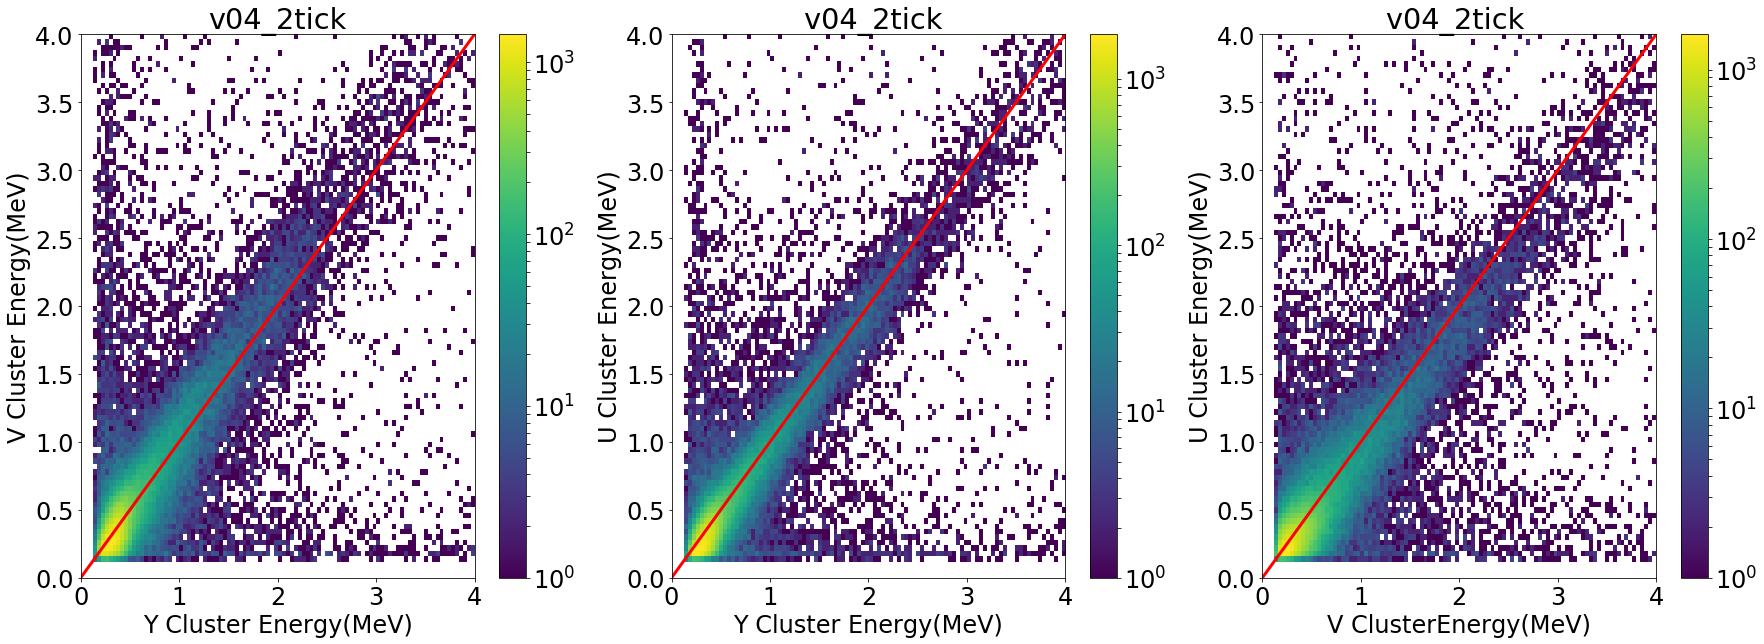

In [105]:
CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge >10.'
CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge>10. '
CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >10. '

#dfChargeCut_v04_2tick = df_delta_2tick.query(CUT)
dfChargeCut_v04_2tick = dfcut_match_v04_2tick.query(CUT)
dfChargeCut_v04_2tick['energyY_v04_2tick'] = E_recoY_v04_2tick(dfChargeCut_v04_2tick,238.4)
dfChargeCut_v04_2tick['energyU_v04_2tick'] = E_recoU_v04_2tick(dfChargeCut_v04_2tick,232)
dfChargeCut_v04_2tick['energyV_v04_2tick'] = E_recoV_v04_2tick(dfChargeCut_v04_2tick,249)


EMAX = 4.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut_v04_2tick['energyY_v04_2tick'].values,dfChargeCut_v04_2tick['energyV_v04_2tick'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v04_2tick')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut_v04_2tick['energyY_v04_2tick'].values,dfChargeCut_v04_2tick['energyU_v04_2tick'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title(' v04_2tick')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut_v04_2tick['energyV_v04_2tick'].values,dfChargeCut_v04_2tick['energyU_v04_2tick'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('v04_2tick ')
#plt.legend(loc=1)

plt.show
plt.draw()
#fig.savefig('Energy1-1.png', dpi=27v00

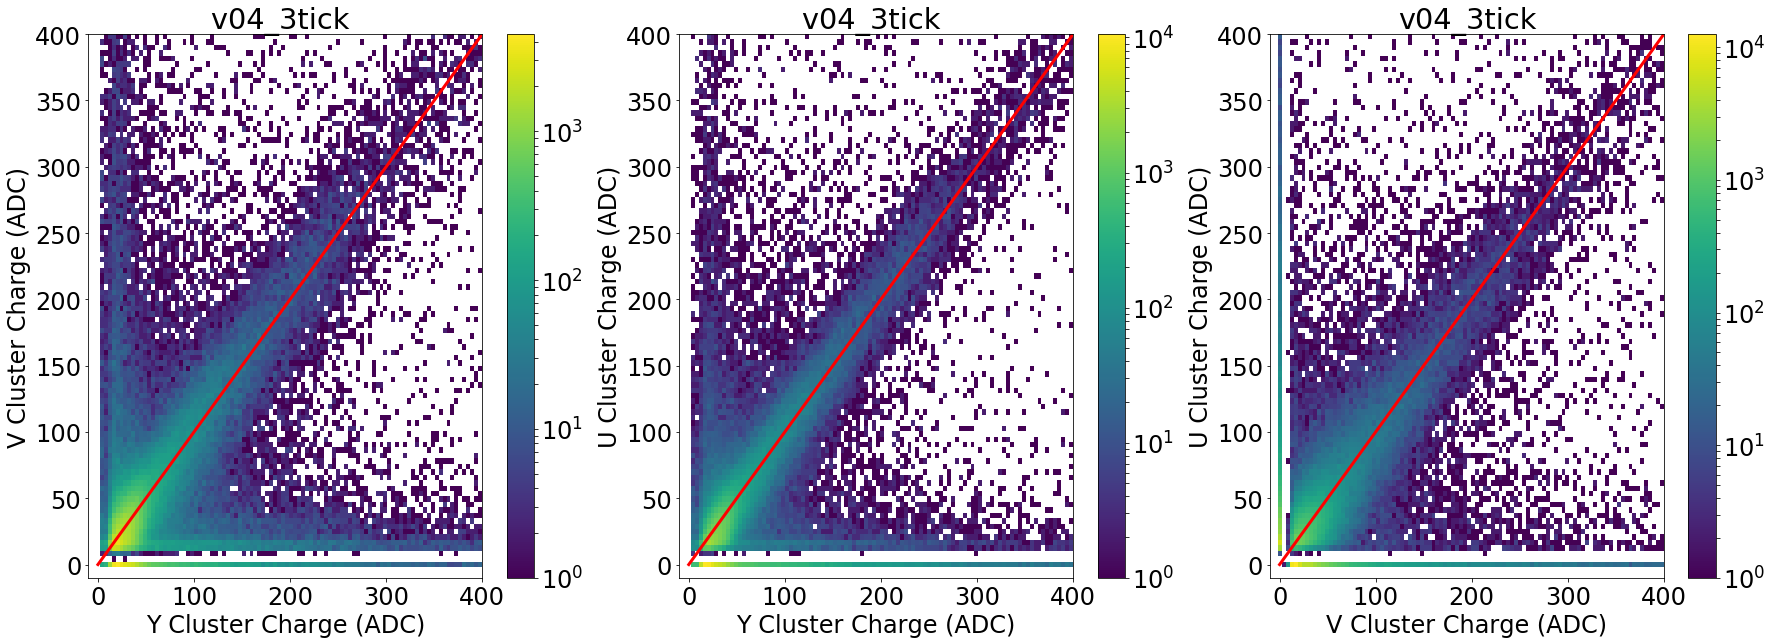

In [106]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
#plt.hist2d(df_delta_3tick['Y_cluster_charge'].values,df_delta_3tick['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.hist2d(dfcut_match_v04_3tick['Y_cluster_charge'].values,dfcut_match_v04_3tick['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v04_3tick ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
#plt.hist2d(df_delta_3tick['Y_cluster_charge'].values,df_delta_3tick['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.hist2d(dfcut_match_v04_3tick['Y_cluster_charge'].values,dfcut_match_v04_3tick['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')

plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v04_3tick ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
#plt.hist2d(df_delta_3tick['V_cluster_charge'].values,df_delta_3tick['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.hist2d(dfcut_match_v04_3tick['V_cluster_charge'].values,dfcut_match_v04_3tick['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')

plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('v04_3tick')
#plt.legend(loc=1)
plt.show()

#plt.draw()
#fig.savefig('charge11.png', dpi=270)



/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

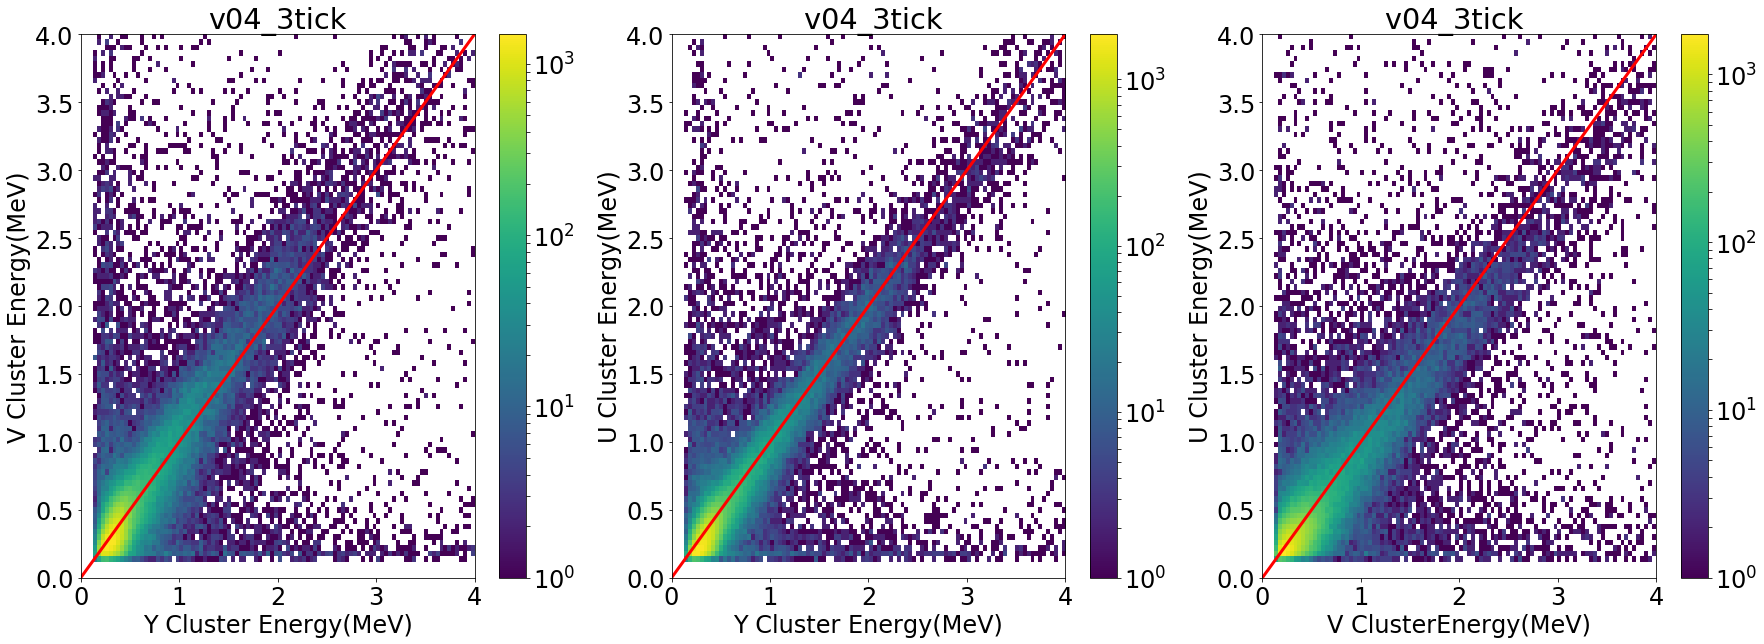

In [107]:
CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge >10.'
CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge>10. '
CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >10. '

#dfChargeCut_v04_3tick = df_delta_3tick.query(CUT)
dfChargeCut_v04_3tick = dfcut_match_v04_3tick.query(CUT)
dfChargeCut_v04_3tick['energyY_v04_3tick'] = E_recoY_v04_3tick(dfChargeCut_v04_3tick,238.4)
dfChargeCut_v04_3tick['energyU_v04_3tick'] = E_recoU_v04_3tick(dfChargeCut_v04_3tick,232)
dfChargeCut_v04_3tick['energyV_v04_3tick'] = E_recoV_v04_3tick(dfChargeCut_v04_3tick,249)


EMAX = 4.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut_v04_3tick['energyY_v04_3tick'].values,dfChargeCut_v04_3tick['energyV_v04_3tick'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v04_3tick')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut_v04_3tick['energyY_v04_3tick'].values,dfChargeCut_v04_3tick['energyU_v04_3tick'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title(' v04_3tick')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut_v04_3tick['energyV_v04_3tick'].values,dfChargeCut_v04_3tick['energyU_v04_3tick'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('v04_3tick ')
#plt.legend(loc=1)

plt.show
plt.draw()
#fig.savefig('Energy1-1.png', dpi=27v00

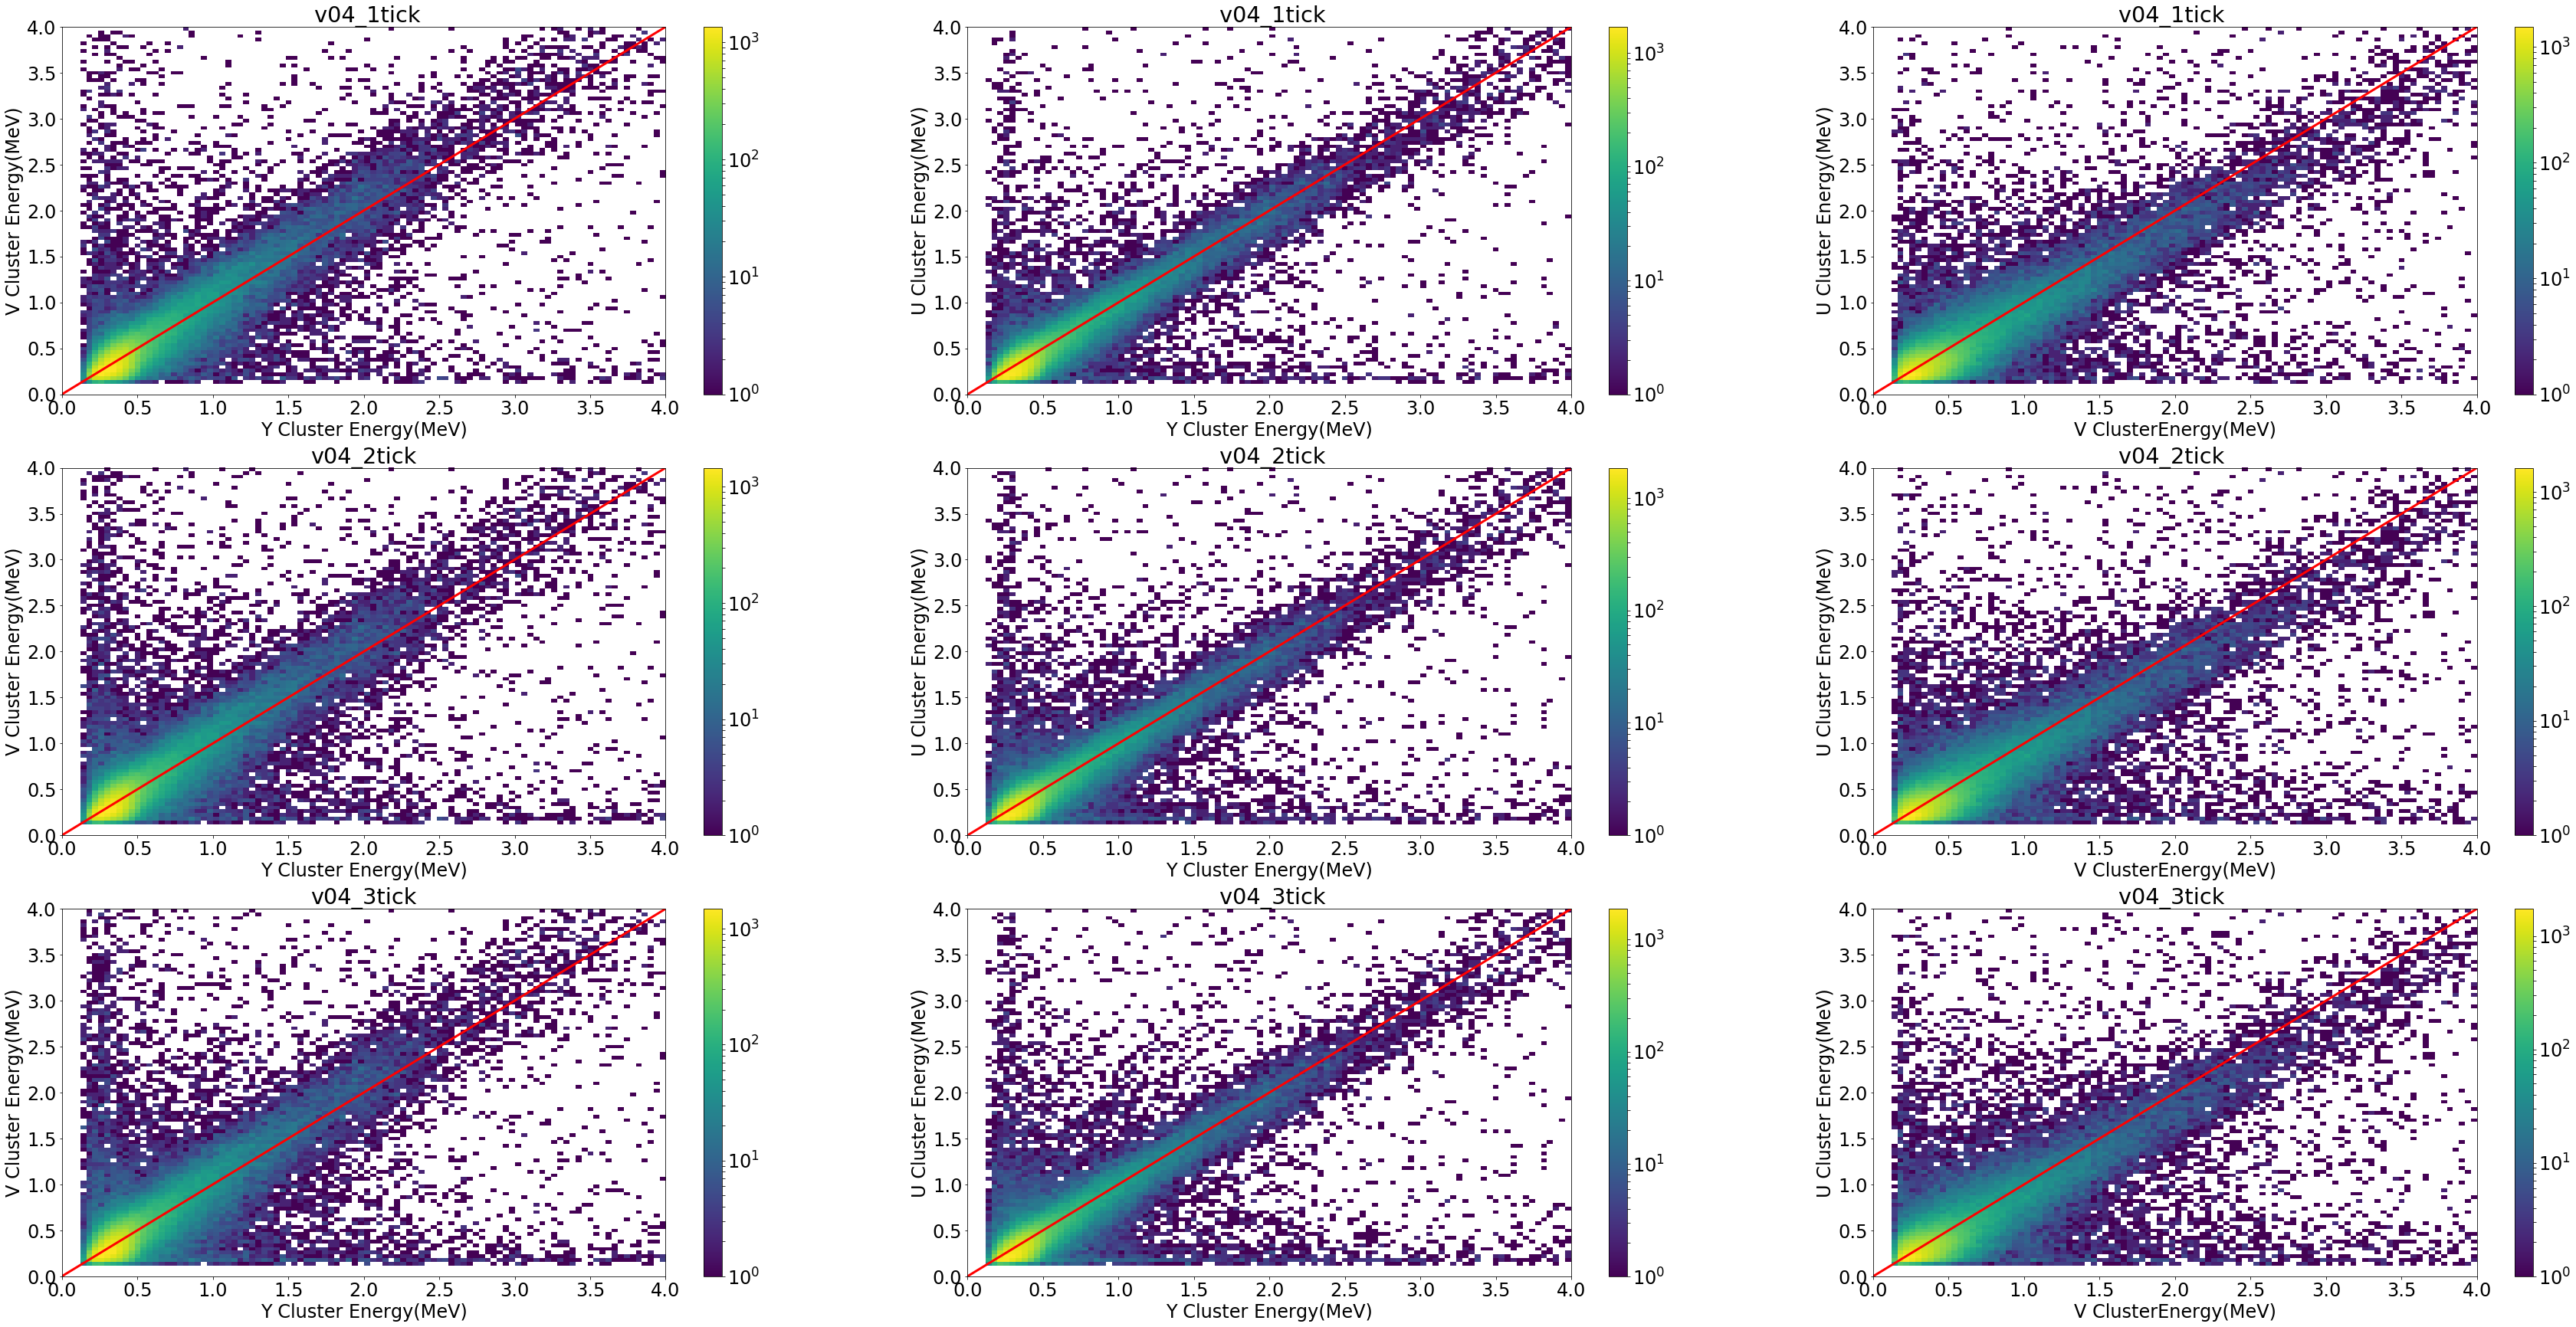

In [108]:
fig = plt.figure(figsize=(60,30))
plt.rcParams.update({'font.size': 24})
plt.subplot(3, 3, 1)
plt.hist2d(dfChargeCut_v04_1tick['energyY_v04_1tick'].values,dfChargeCut_v04_1tick['energyV_v04_1tick'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title(' v04_1tick')
plt.subplot(3, 3, 2)
plt.hist2d(dfChargeCut_v04_1tick['energyY_v04_1tick'].values,dfChargeCut_v04_1tick['energyU_v04_1tick'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title(' v04_1tick')
#plt.legend(loc=1)
plt.subplot(3, 3, 3)
plt.hist2d(dfChargeCut_v04_1tick['energyV_v04_1tick'].values,dfChargeCut_v04_1tick['energyU_v04_1tick'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('v04_1tick ')

plt.subplot(3, 3, 4)
plt.hist2d(dfChargeCut_v04_2tick['energyY_v04_2tick'].values,dfChargeCut_v04_2tick['energyV_v04_2tick'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v04_2tick')
#plt.legend(loc=1)
plt.subplot(3, 3, 5)
plt.hist2d(dfChargeCut_v04_2tick['energyY_v04_2tick'].values,dfChargeCut_v04_2tick['energyU_v04_2tick'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title(' v04_2tick')
#plt.legend(loc=1)
plt.subplot(3, 3, 6)
plt.hist2d(dfChargeCut_v04_2tick['energyV_v04_2tick'].values,dfChargeCut_v04_2tick['energyU_v04_2tick'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('v04_2tick ')
#plt.legend(loc=1)
plt.subplot(3, 3, 7)
plt.hist2d(dfChargeCut_v04_3tick['energyY_v04_3tick'].values,dfChargeCut_v04_3tick['energyV_v04_3tick'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v04_3tick')
plt.subplot(3, 3, 8)
plt.hist2d(dfChargeCut_v04_3tick['energyY_v04_3tick'].values,dfChargeCut_v04_3tick['energyU_v04_3tick'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title(' v04_3tick')
plt.subplot(3, 3, 9)
plt.hist2d(dfChargeCut_v04_3tick['energyV_v04_3tick'].values,dfChargeCut_v04_3tick['energyU_v04_3tick'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('v04_3tick ')
plt.show()
fig.savefig('comparisons.png', dpi=300)

In [109]:
df_Matching_1tick_v04.head()

,V_biggest_iou,V_match_multiplicity,U_biggest_iou,U_match_multiplicity,Y_clus_lifetime,Y_clus_hitSize,V_clus_hitSize,U_clus_hitSize,Y_cluster_3d_hit_z,Y_cluster_3d_hit_x,...,YU_iou,deltaY,deltaY_smallest,Y_Wire,start_tick_cluster0,start_tick_cluster1,start_tick_cluster2,end_tick_cluster0,end_tick_cluster1,end_tick_cluster2
entry,,,,,,,,,,,,,,,,,,,,,
44,0.014231,5,0.014231,5,140.539551,32.0,1.0,1.0,408.599999,92.926463,...,0.005869,46.938577,0.173205,1368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
45,0.772776,1,0.557165,1,2.000000,1.0,1.0,2.0,420.299999,69.368987,...,0.557165,0.173205,0.173205,1401,2073.461914,2074.872070,2074.615723,2077.051514,2076.872070,2076.615723
46,0.542750,1,-1.000000,0,2.000000,1.0,1.0,2.0,421.499999,135.053396,...,-1.000000,-9999.000000,0.173205,1405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
47,0.346968,2,0.163523,1,3.716064,2.0,1.0,2.0,431.399999,106.322222,...,0.163523,-0.173205,0.173205,1439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
48,0.657319,1,0.397666,1,2.400635,2.0,1.0,1.0,432.899999,43.715459,...,0.397666,-0.173205,0.173205,1444,1608.456909,1607.963623,1607.308350,1610.456909,1609.963623,1609.708984


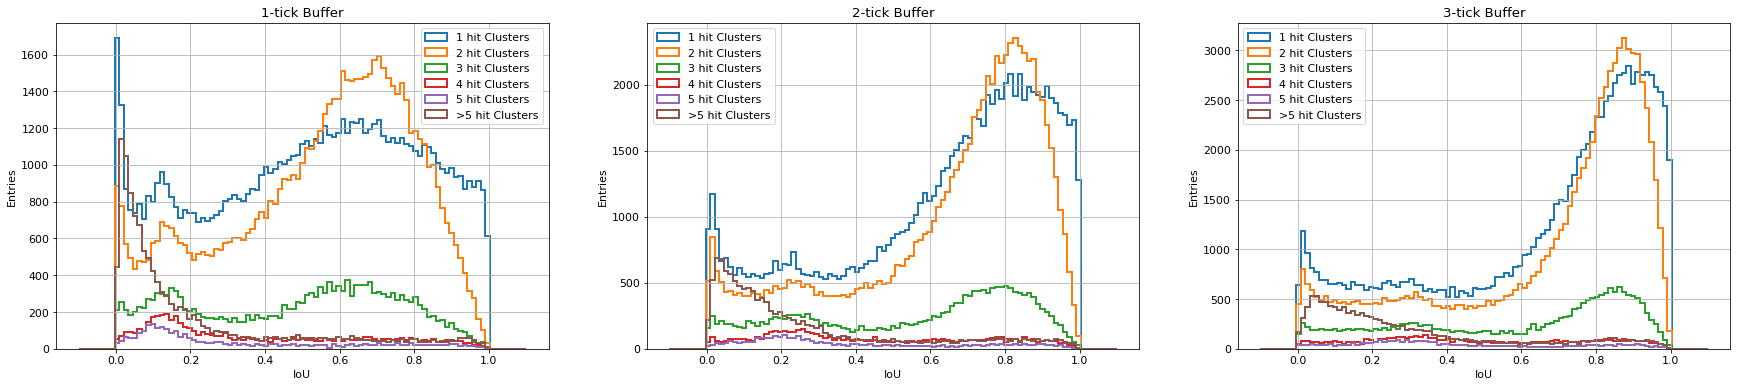

In [110]:
df_Matching_1tick_v04_1hit=df_Matching_1tick_v04.query('Y_clus_hitSize==1')
df_Matching_1tick_v04_2hit=df_Matching_1tick_v04.query('Y_clus_hitSize==2')
df_Matching_1tick_v04_3hit=df_Matching_1tick_v04.query('Y_clus_hitSize==3')
df_Matching_1tick_v04_4hit=df_Matching_1tick_v04.query('Y_clus_hitSize==4')
df_Matching_1tick_v04_5hit=df_Matching_1tick_v04.query('Y_clus_hitSize==5')
df_Matching_1tick_v04_g5hit=df_Matching_1tick_v04.query('Y_clus_hitSize>5')
df_Matching_2tick_v04_1hit=df_Matching_2tick_v04.query('Y_clus_hitSize==1')
df_Matching_2tick_v04_2hit=df_Matching_2tick_v04.query('Y_clus_hitSize==2')
df_Matching_2tick_v04_3hit=df_Matching_2tick_v04.query('Y_clus_hitSize==3')
df_Matching_2tick_v04_4hit=df_Matching_2tick_v04.query('Y_clus_hitSize==4')
df_Matching_2tick_v04_5hit=df_Matching_2tick_v04.query('Y_clus_hitSize==5')
df_Matching_2tick_v04_g5hit=df_Matching_2tick_v04.query('Y_clus_hitSize>5')
df_Matching_3tick_v04_1hit=df_Matching_3tick_v04.query('Y_clus_hitSize==1')
df_Matching_3tick_v04_2hit=df_Matching_3tick_v04.query('Y_clus_hitSize==2')
df_Matching_3tick_v04_3hit=df_Matching_3tick_v04.query('Y_clus_hitSize==3')
df_Matching_3tick_v04_4hit=df_Matching_3tick_v04.query('Y_clus_hitSize==4')
df_Matching_3tick_v04_5hit=df_Matching_3tick_v04.query('Y_clus_hitSize==5')
df_Matching_3tick_v04_g5hit=df_Matching_3tick_v04.query('Y_clus_hitSize>5')
fig = plt.figure(figsize=(30,6))
plt.rcParams.update({'font.size': 11})
BINS = np.linspace(-0.1,1.1,100)
plt.subplot(1, 3, 1)
plt.hist(df_Matching_1tick_v04_1hit['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='1 hit Clusters')#,density='True')
plt.hist(df_Matching_1tick_v04_2hit['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='2 hit Clusters')#,density='True')
plt.hist(df_Matching_1tick_v04_3hit['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='3 hit Clusters')#,density='True')
plt.hist(df_Matching_1tick_v04_4hit['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='4 hit Clusters')#,density='True')
plt.hist(df_Matching_1tick_v04_5hit['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='5 hit Clusters')#,density='True')
plt.hist(df_Matching_1tick_v04_g5hit['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='>5 hit Clusters')#,density='True')
#plt.hist(df_Matching_3tick_v04['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04_3tick',density='True')
plt.title("IoU Value for Y-V Plane Matching")
plt.xlabel('IoU')
plt.ylabel('Entries')
plt.title('1-tick Buffer')
plt.grid()
plt.legend(loc=1)
plt.subplot(1,3,2)
plt.hist(df_Matching_2tick_v04_1hit['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='1 hit Clusters')#,density='True')
plt.hist(df_Matching_2tick_v04_2hit['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='2 hit Clusters')#,density='True')
plt.hist(df_Matching_2tick_v04_3hit['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='3 hit Clusters')#,density='True')
plt.hist(df_Matching_2tick_v04_4hit['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='4 hit Clusters')#,density='True')
plt.hist(df_Matching_2tick_v04_5hit['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='5 hit Clusters')#,density='True')
plt.hist(df_Matching_2tick_v04_g5hit['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='>5 hit Clusters')#,density='True')
#plt.hist(df_Matching_3tick_v04['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04_3tick',density='True')
plt.title("IoU Value for Y-V Plane Matching")
plt.xlabel('IoU')
plt.ylabel('Entries')
plt.title('2-tick Buffer')
plt.grid()
plt.legend(loc=2)
plt.subplot(1, 3, 3)
plt.hist(df_Matching_3tick_v04_1hit['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='1 hit Clusters')#,density='True')
plt.hist(df_Matching_3tick_v04_2hit['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='2 hit Clusters')#,density='True')
plt.hist(df_Matching_3tick_v04_3hit['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='3 hit Clusters')#,density='True')
plt.hist(df_Matching_3tick_v04_4hit['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='4 hit Clusters')#,density='True')
plt.hist(df_Matching_3tick_v04_5hit['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='5 hit Clusters')#,density='True')
plt.hist(df_Matching_3tick_v04_g5hit['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='>5 hit Clusters')#,density='True')
#plt.hist(df_Matching_3tick_v04['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04_3tick',density='True')
plt.title("IoU Value for Y-V Plane Matching")
plt.xlabel('IoU')
plt.ylabel('Entries')
plt.title('3-tick Buffer')
plt.grid()
plt.legend(loc=2)
plt.show()
fig.savefig('clus_size_tick',dpi=300)